In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 2015




In [2]:
df = pd.read_csv('2013_tbi_rate_vs_matuarity.csv')
taget = 'target'
nrows , ncols = df.shape
df.head()

Matuarity   Jan   Feb   Mar   Apr   May  June  July   Aug  Sept   Oct  \
0        0.5  0.51 -0.71 -1.19 -1.54 -1.23 -0.84 -0.26  0.82  1.03  0.43   
1        1.0  0.21 -0.69 -1.04 -1.37 -1.11 -0.81 -0.36  0.49  0.65  0.22   
2        1.5 -0.03 -0.65 -0.90 -1.20 -1.00 -0.77 -0.44  0.22  0.34  0.05   
3        2.0 -0.18 -0.60 -0.76 -1.05 -0.87 -0.69 -0.45  0.06  0.15 -0.05   
4        2.5 -0.24 -0.53 -0.63 -0.91 -0.74 -0.59 -0.41 -0.01  0.06 -0.08   

    Nov   Dec  
0  0.05  0.11  
1  0.02  0.08  
2  0.00  0.07  
3  0.02  0.08  
4  0.06  0.12

In [3]:
df.describe()

Matuarity         Jan         Feb         Mar         Apr        May  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.00000   
mean    50.250000    0.680850    0.720050    0.731850    0.654200    0.97560   
std     28.939592    0.219036    0.328143    0.367784    0.431034    0.46863   
min      0.500000   -0.240000   -0.710000   -1.190000   -1.540000   -1.23000   
25%     25.375000    0.690000    0.750000    0.750000    0.680000    0.98000   
50%     50.250000    0.760000    0.840000    0.870000    0.815000    1.16000   
75%     75.125000    0.800000    0.882500    0.912500    0.870000    1.23000   
max    100.000000    0.820000    0.910000    0.940000    0.900000    1.26000   

            June        July         Aug        Sept        Oct         Nov  \
count  200.00000  200.000000  200.000000  200.000000  200.00000  200.000000   
mean     1.15800    1.152850    1.147750    1.314800    1.29670    1.317250   
std      0.47202    0.420669    0.317662    0.340955    0.39417    0.361205   
min     -0.84000   -0.450000   -0.010000    0.060000   -0.08000    0.000000   
25%      1.14000    1.117500    1.097500    1.270000    1.23750    1.277500   
50%      1.35000    1.330000    1.285000    1.460000    1.47000    1.470000   
75%      1.42000    1.400000    1.350000    1.530000    1.55000    1.540000   
max      1.46000    1.440000    1.380000    1.560000    1.59000    1.570000   

              Dec  
count  200.000000  
mean     1.319500  
std      0.337336  
min      0.070000  
25%      1.287500  
50%      1.460000  
75%      1.520000  
max      1.550000

In [4]:
df.cov()

Matuarity       Jan       Feb       Mar       Apr       May  \
Matuarity  837.500000  4.570038  6.485465  7.224962  8.546809  9.707111   
Jan          4.570038  0.047977  0.067963  0.073415  0.086820  0.095685   
Feb          6.485465  0.067963  0.107678  0.119999  0.140914  0.153070   
Mar          7.224962  0.073415  0.119999  0.135265  0.158443  0.171846   
Apr          8.546809  0.086820  0.140914  0.158443  0.185790  0.201636   
May          9.707111  0.095685  0.153070  0.171846  0.201636  0.219614   
June        10.129824  0.097576  0.153559  0.172016  0.202003  0.220786   
July         9.397877  0.088766  0.135522  0.150747  0.177400  0.194858   
Aug          7.445415  0.068029  0.096202  0.104924  0.124185  0.138141   
Sept         7.871910  0.073423  0.103229  0.112169  0.132855  0.147696   
Oct          9.216055  0.083927  0.122902  0.135314  0.159852  0.176928   
Nov          8.239761  0.075601  0.115615  0.128783  0.151637  0.166775   
Dec          7.640804  0.070604  0.108338  0.120755  0.142121  0.156172   

                June      July       Aug      Sept       Oct       Nov  \
Matuarity  10.129824  9.397877  7.445415  7.871910  9.216055  8.239761   
Jan         0.097576  0.088766  0.068029  0.073423  0.083927  0.075601   
Feb         0.153559  0.135522  0.096202  0.103229  0.122902  0.115615   
Mar         0.172016  0.150747  0.104924  0.112169  0.135314  0.128783   
Apr         0.202003  0.177400  0.124185  0.132855  0.159852  0.151637   
May         0.220786  0.194858  0.138141  0.147696  0.176928  0.166775   
June        0.222803  0.197673  0.142021  0.151794  0.180903  0.169350   
July        0.197673  0.176962  0.130045  0.139119  0.164118  0.151765   
Aug         0.142021  0.130045  0.100909  0.108223  0.124554  0.111761   
Sept        0.151794  0.139119  0.108223  0.116250  0.133383  0.119439   
Oct         0.180903  0.164118  0.124554  0.133383  0.155370  0.141171   
Nov         0.169350  0.151765  0.111761  0.119439  0.141171  0.130469   
Dec         0.158448  0.141804  0.104091  0.111247  0.131598  0.121819   

                Dec  
Matuarity  7.640804  
Jan        0.070604  
Feb        0.108338  
Mar        0.120755  
Apr        0.142121  
May        0.156172  
June       0.158448  
July       0.141804  
Aug        0.104091  
Sept       0.111247  
Oct        0.131598  
Nov        0.121819  
Dec        0.113796

In [5]:
df.var()

Matuarity    837.500000
Jan            0.047977
Feb            0.107678
Mar            0.135265
Apr            0.185790
May            0.219614
June           0.222803
July           0.176962
Aug            0.100909
Sept           0.116250
Oct            0.155370
Nov            0.130469
Dec            0.113796
dtype: float64

In [6]:
df.head()

Matuarity   Jan   Feb   Mar   Apr   May  June  July   Aug  Sept   Oct  \
0        0.5  0.51 -0.71 -1.19 -1.54 -1.23 -0.84 -0.26  0.82  1.03  0.43   
1        1.0  0.21 -0.69 -1.04 -1.37 -1.11 -0.81 -0.36  0.49  0.65  0.22   
2        1.5 -0.03 -0.65 -0.90 -1.20 -1.00 -0.77 -0.44  0.22  0.34  0.05   
3        2.0 -0.18 -0.60 -0.76 -1.05 -0.87 -0.69 -0.45  0.06  0.15 -0.05   
4        2.5 -0.24 -0.53 -0.63 -0.91 -0.74 -0.59 -0.41 -0.01  0.06 -0.08   

    Nov   Dec  
0  0.05  0.11  
1  0.02  0.08  
2  0.00  0.07  
3  0.02  0.08  
4  0.06  0.12

In [7]:
name = df.columns[1:]

In [8]:
col = list(df)
col.remove('Matuarity')
df['sum']=(df[col].sum(axis=1))/12

In [9]:
l1=list(df['sum'])
mat = list(df.iloc[:,0])

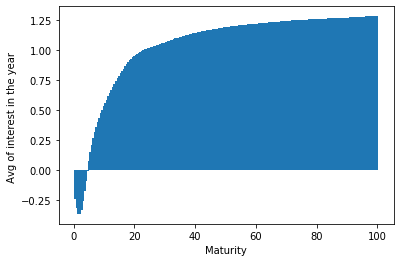

In [10]:
plt.bar(mat,l1)
plt.xlabel("Maturity")
plt.ylabel(" Avg of interest in the year  ")
plt.show()

Saturation point hence recieved is : ---> 35 weeks

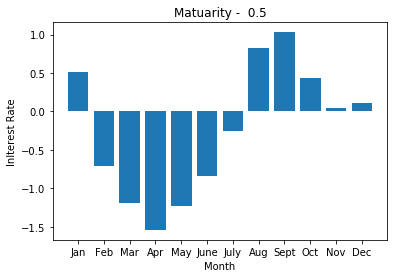

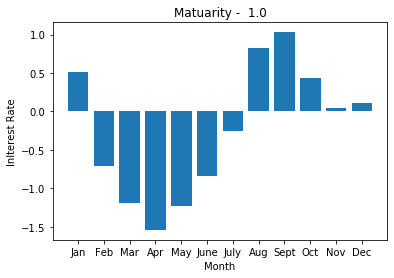

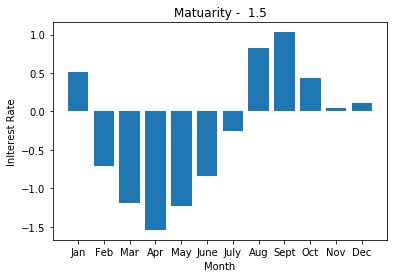

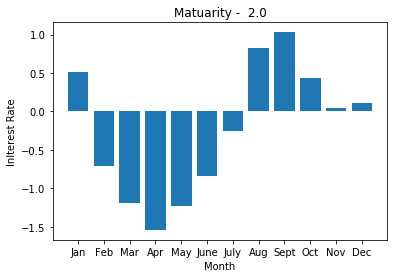

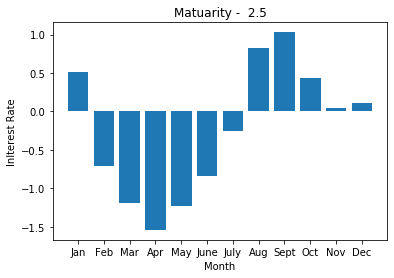

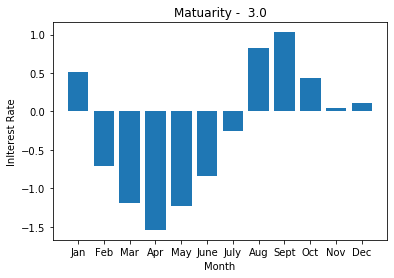

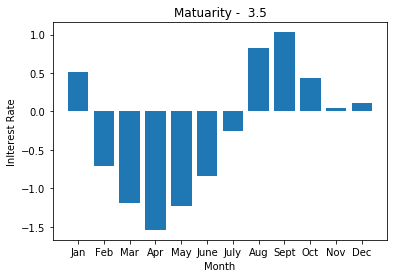

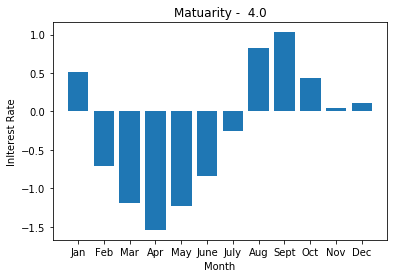

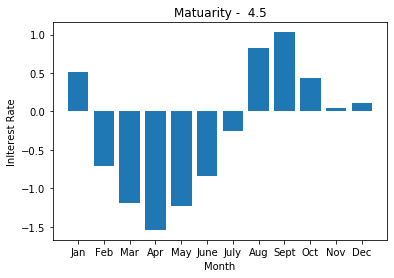

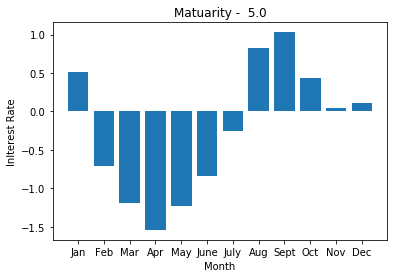

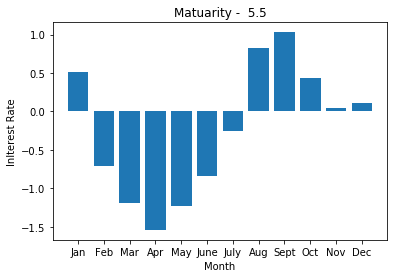

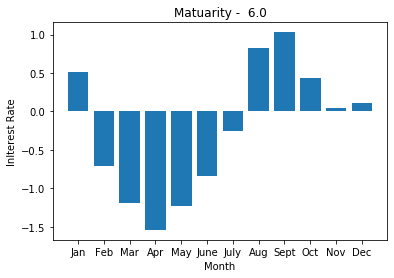

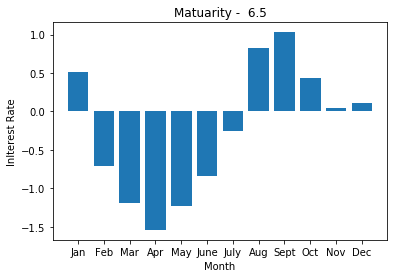

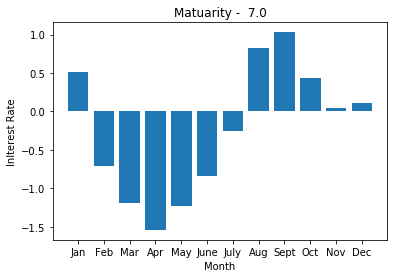

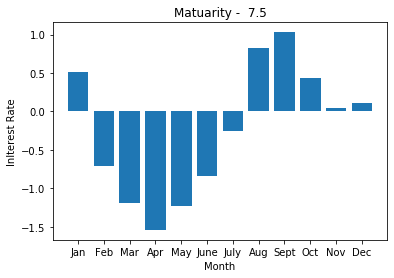

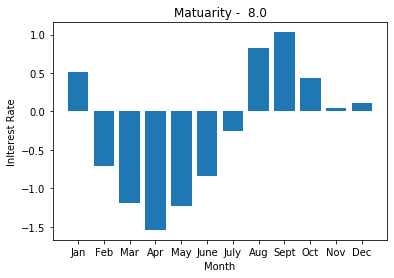

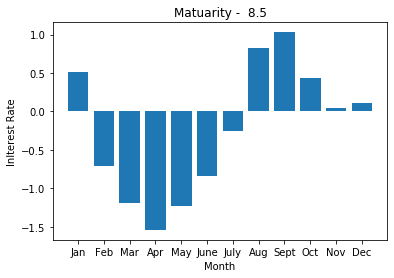

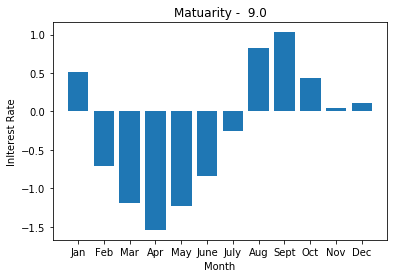

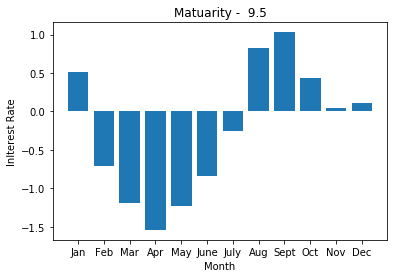

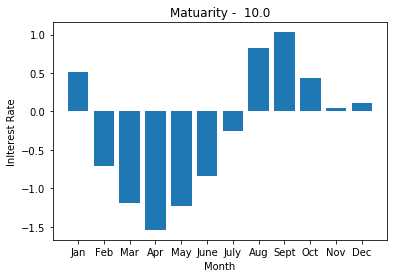

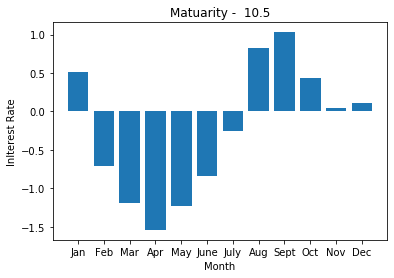

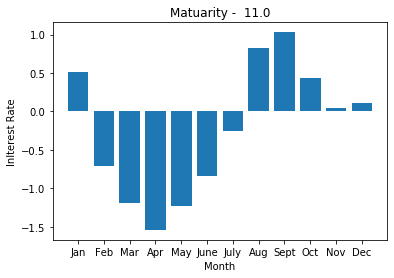

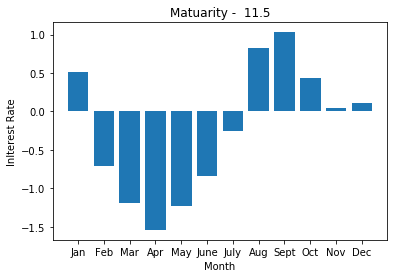

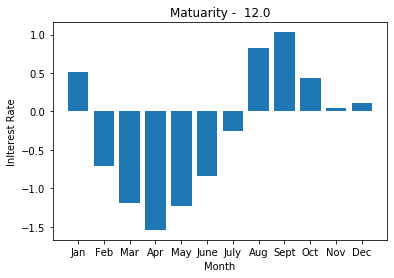

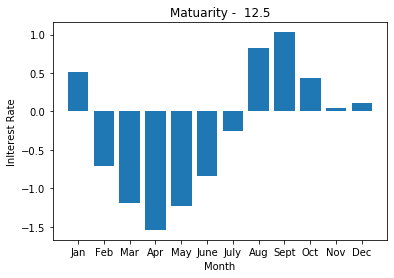

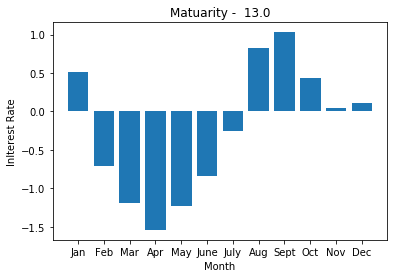

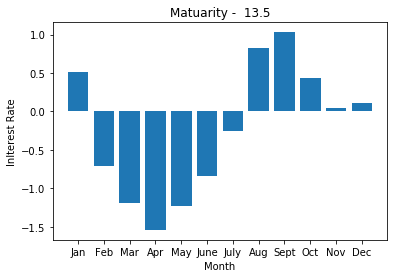

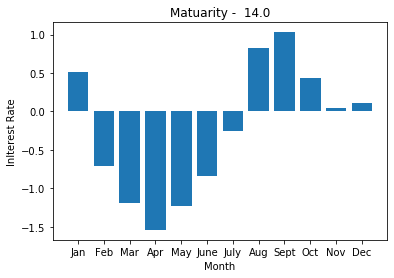

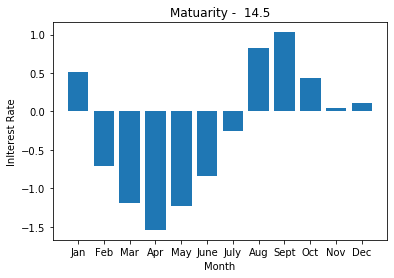

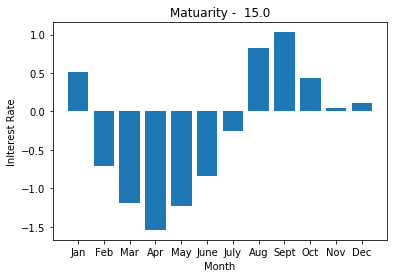

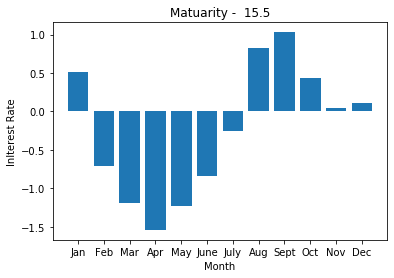

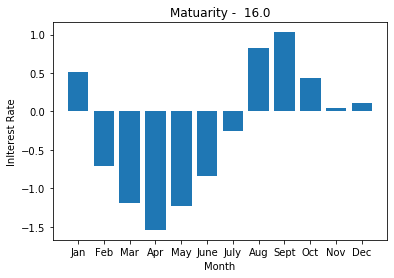

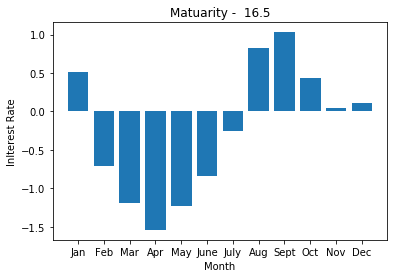

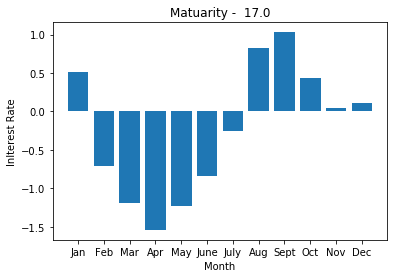

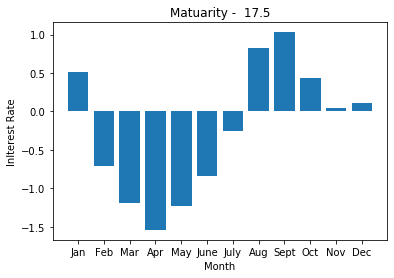

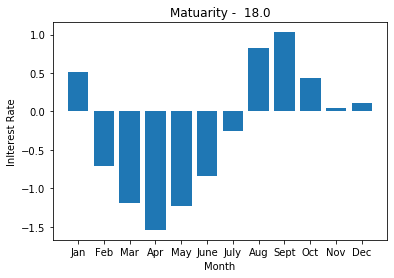

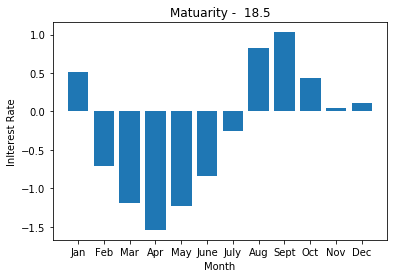

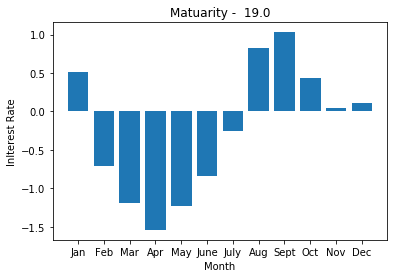

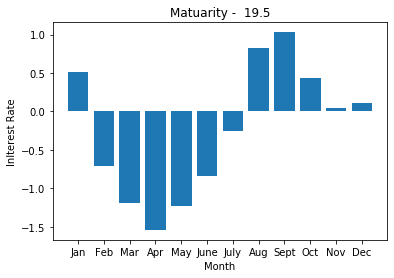

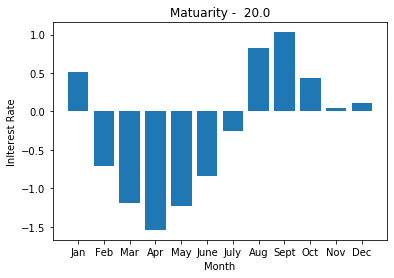

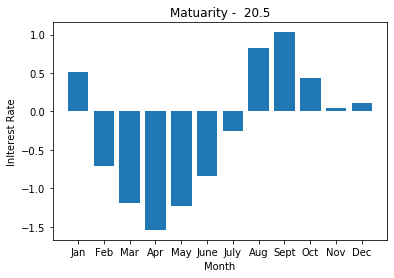

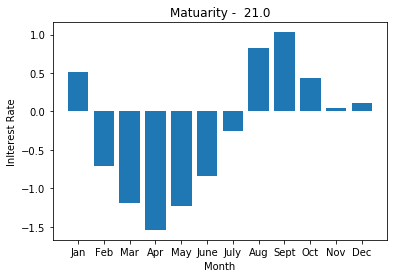

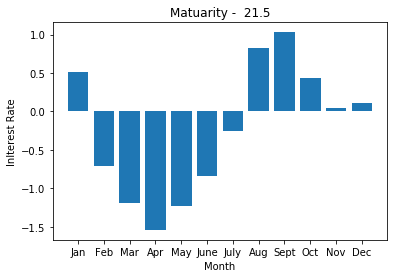

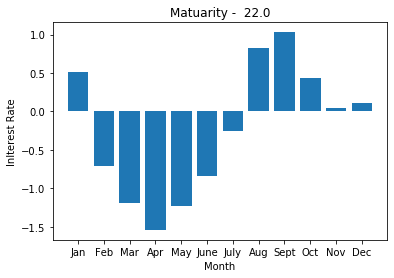

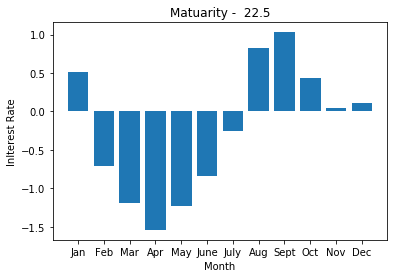

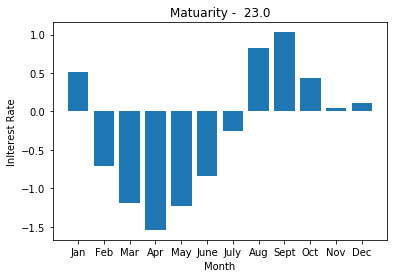

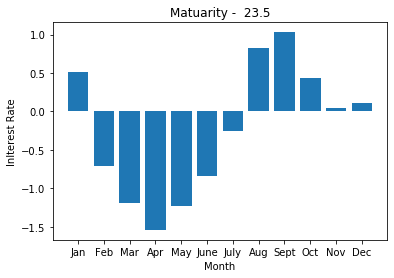

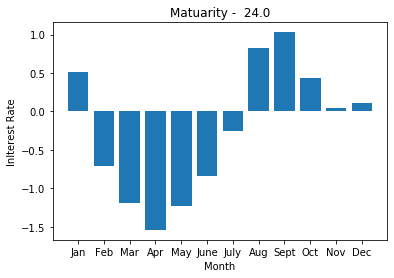

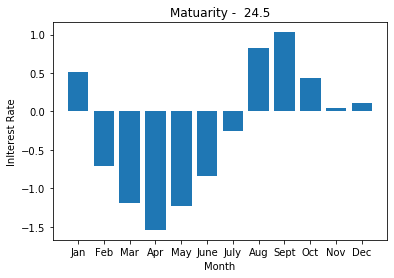

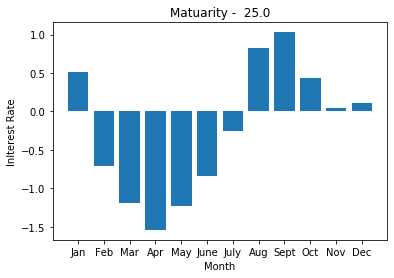

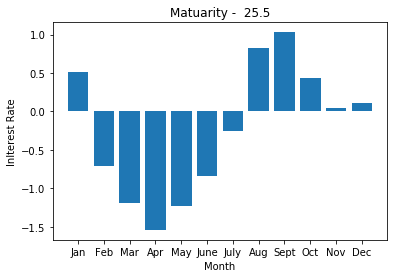

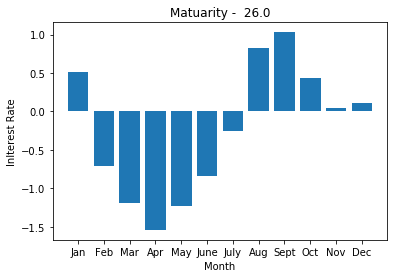

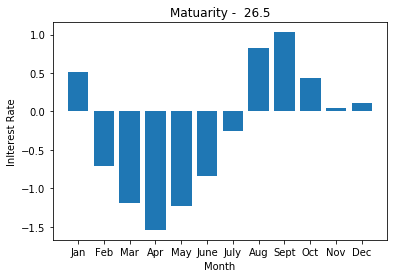

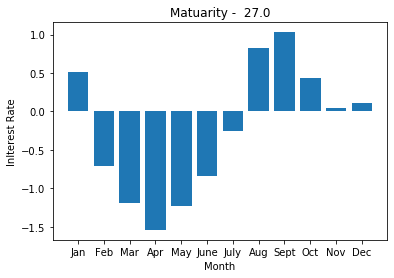

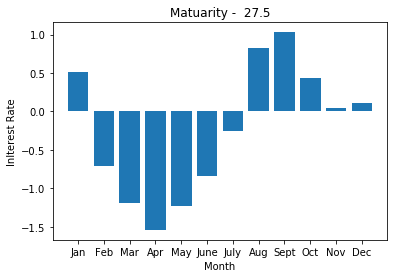

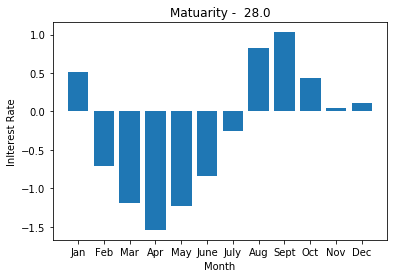

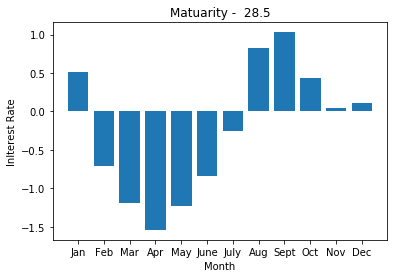

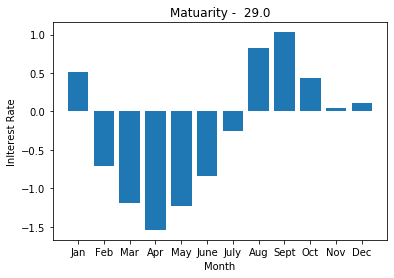

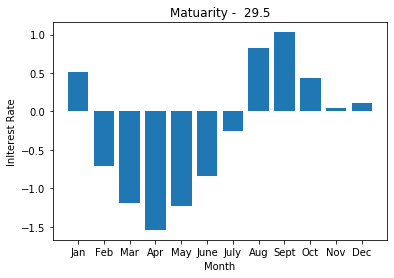

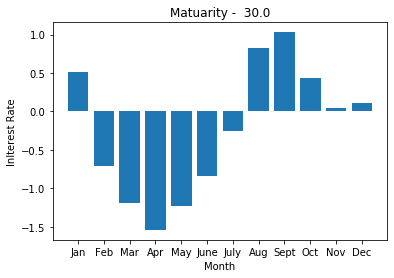

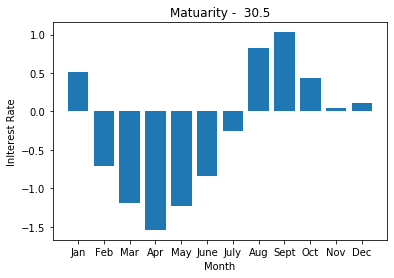

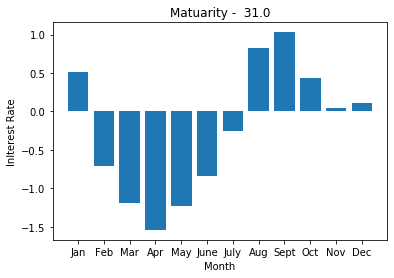

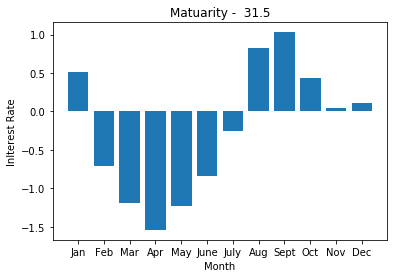

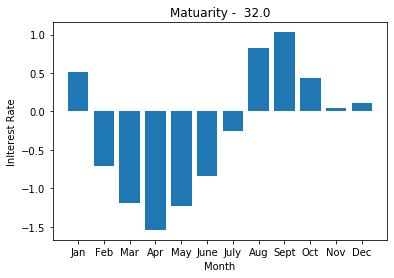

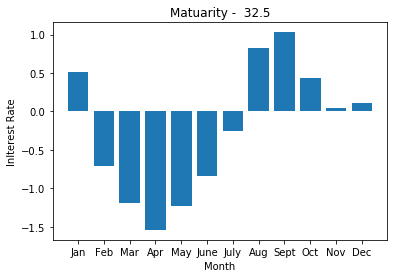

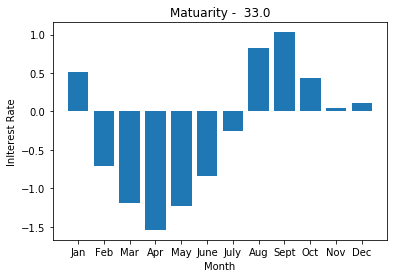

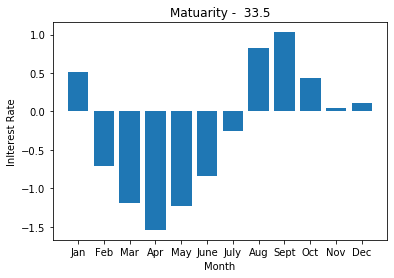

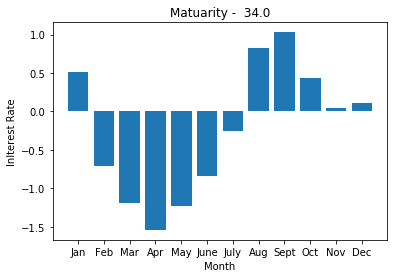

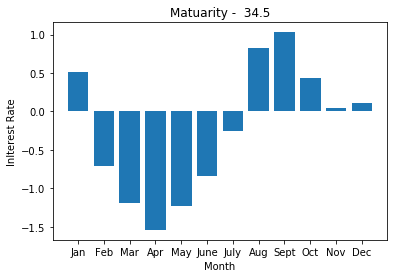

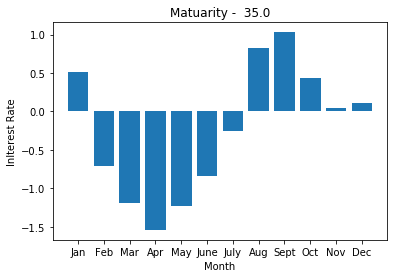

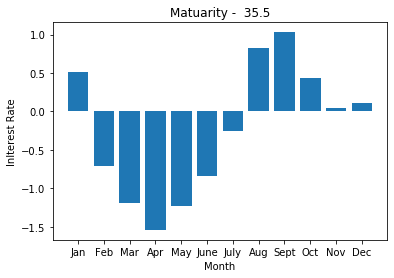

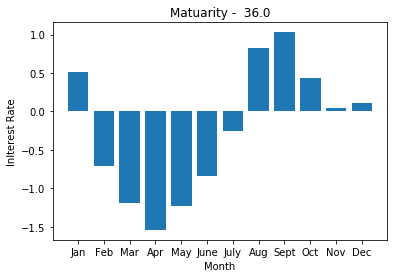

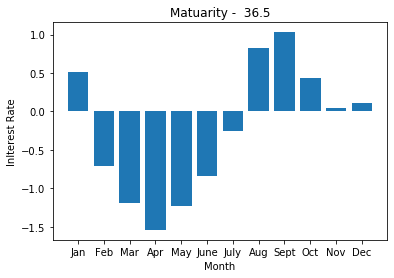

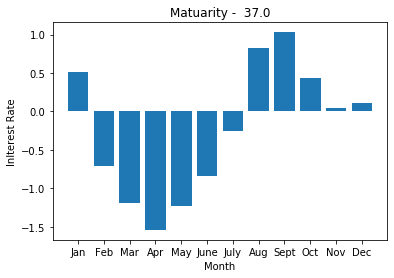

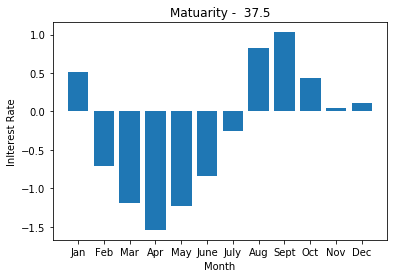

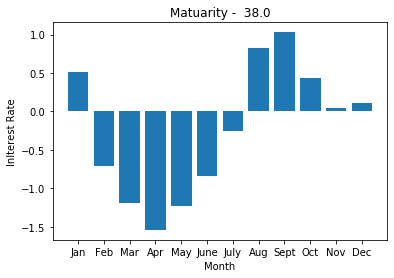

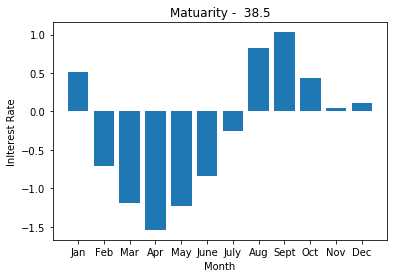

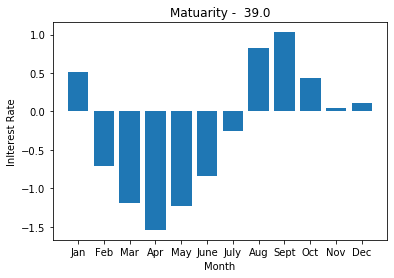

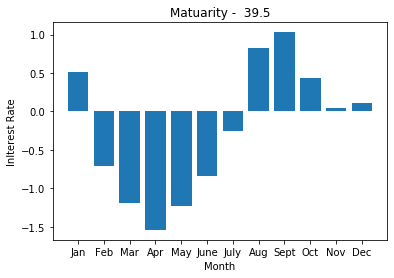

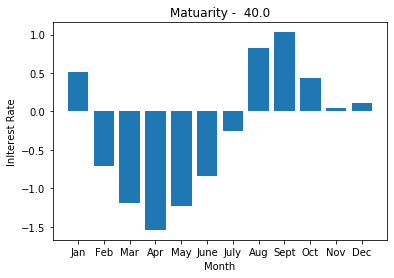

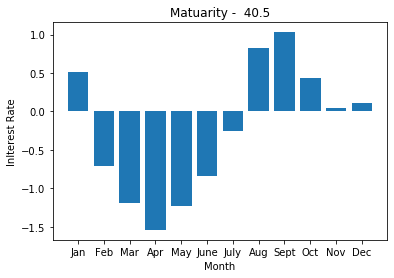

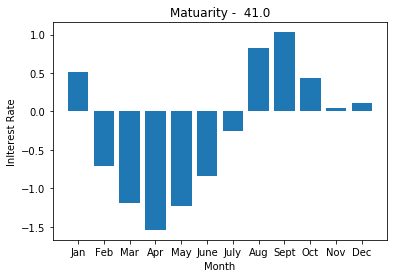

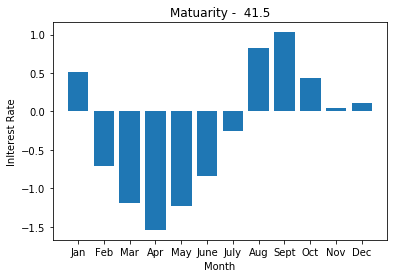

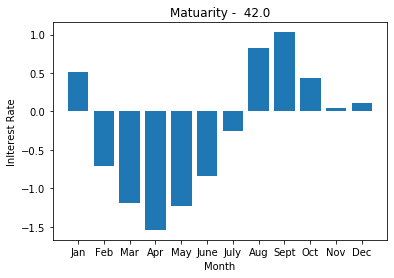

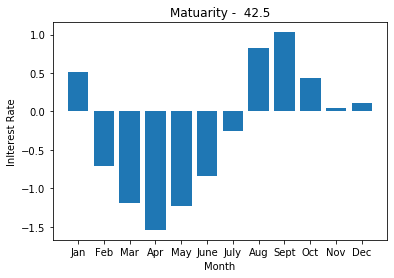

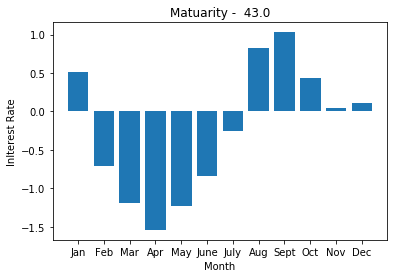

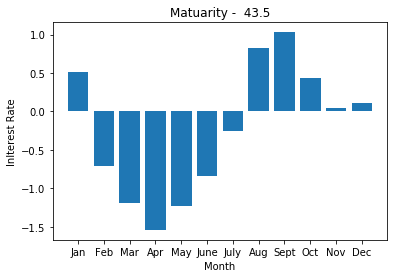

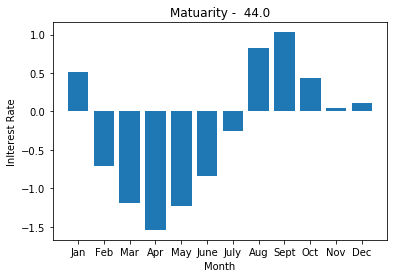

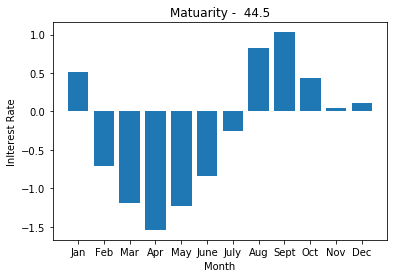

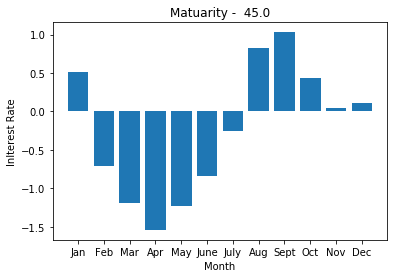

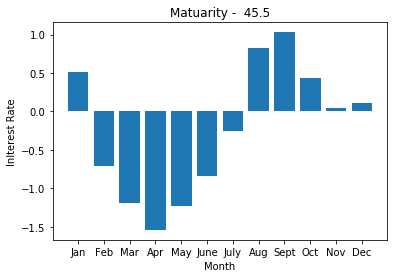

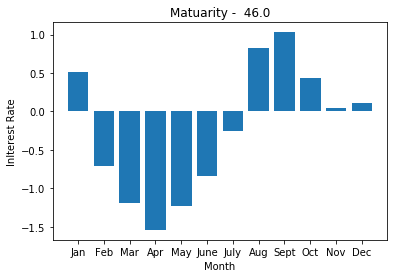

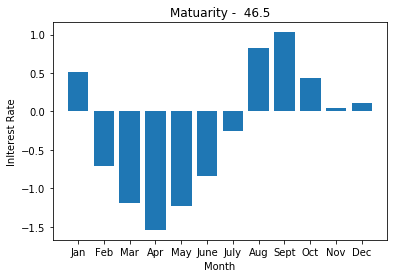

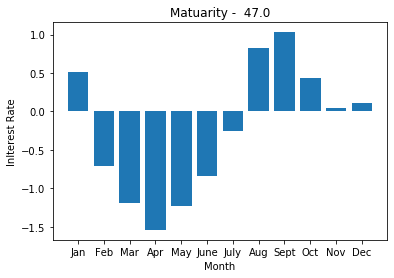

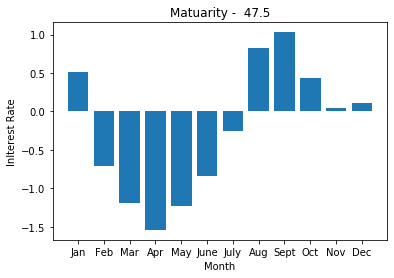

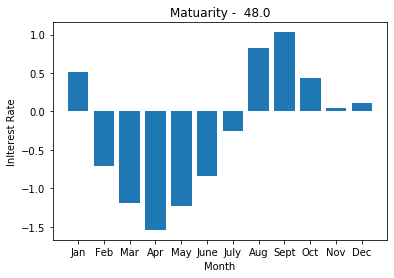

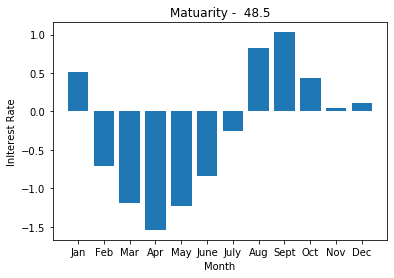

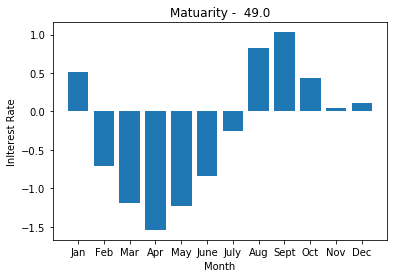

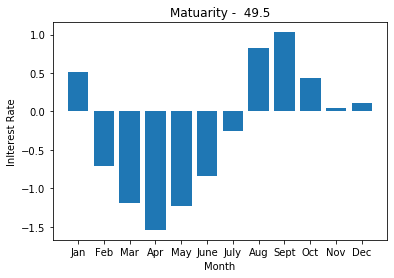

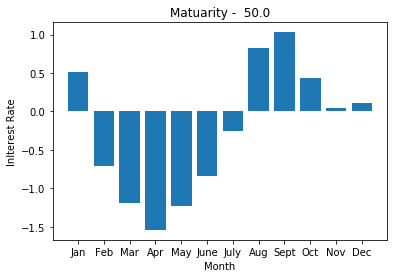

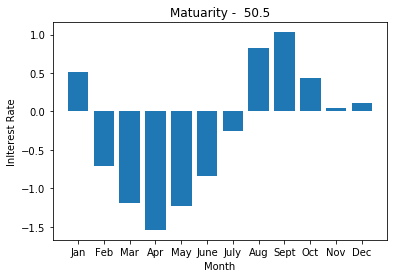

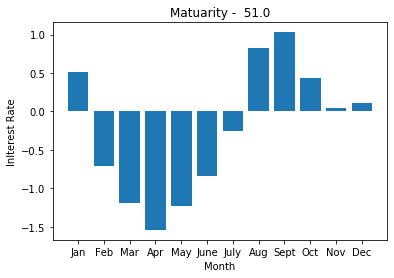

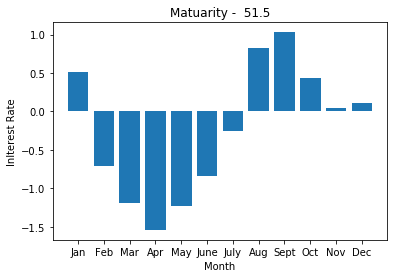

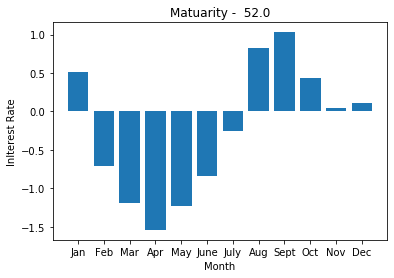

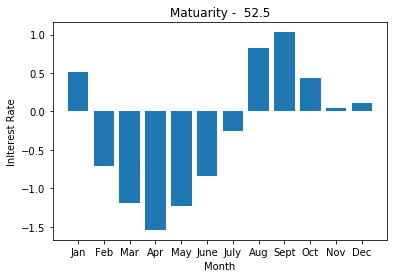

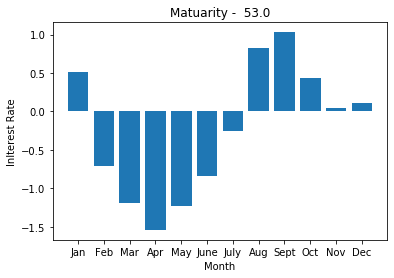

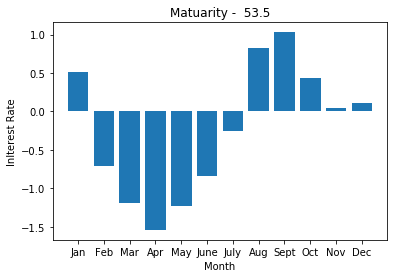

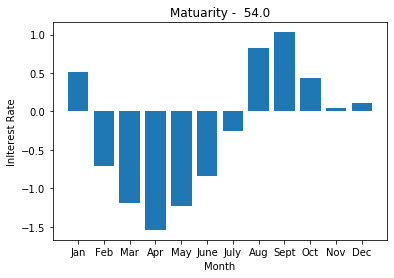

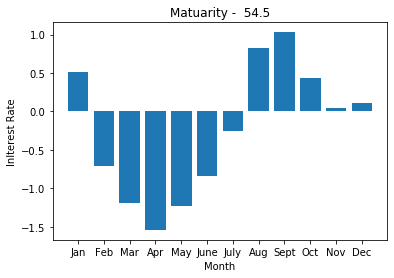

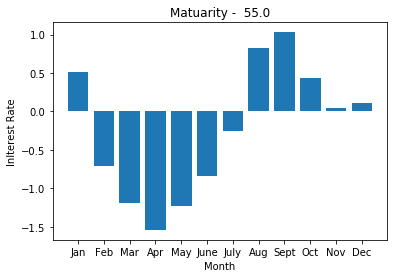

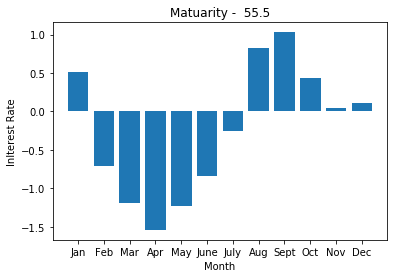

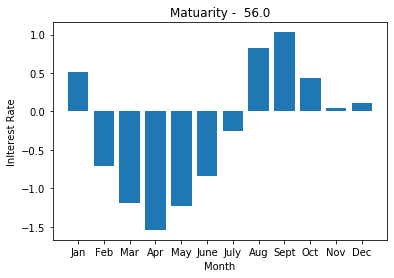

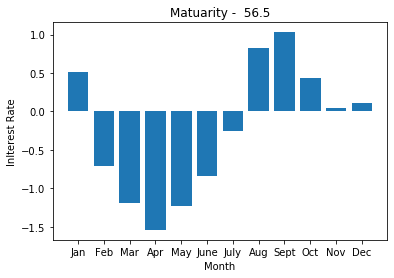

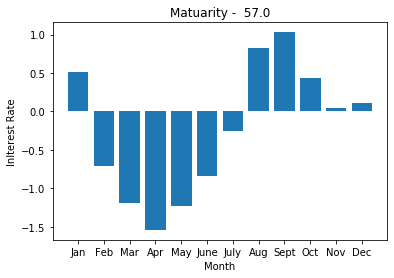

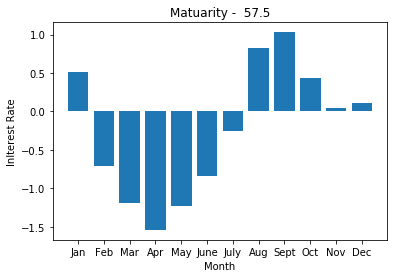

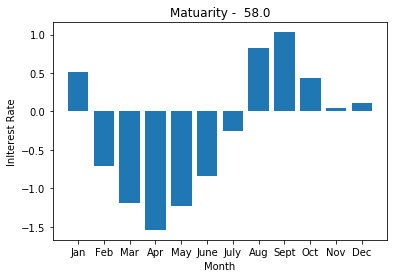

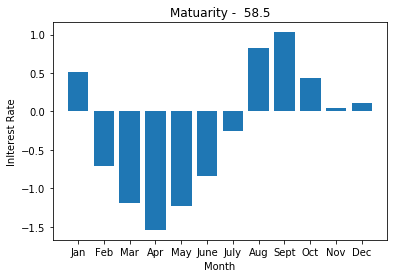

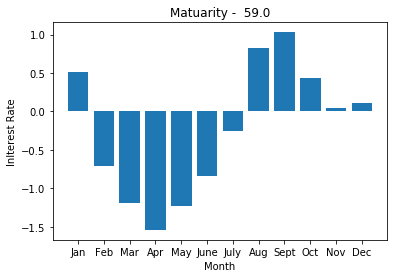

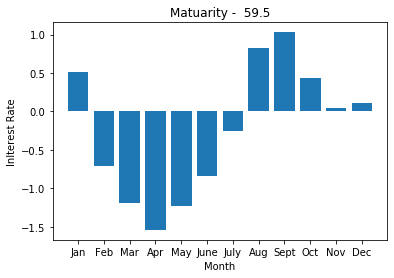

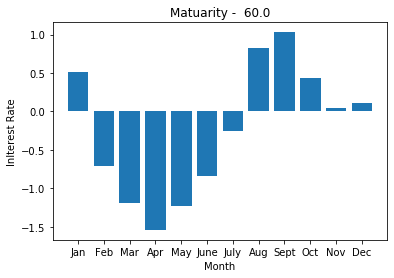

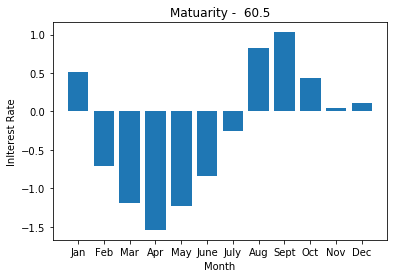

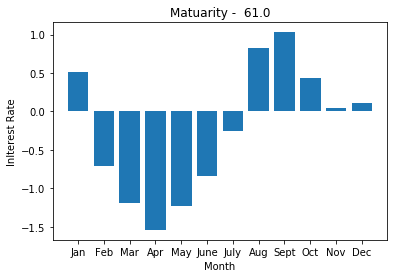

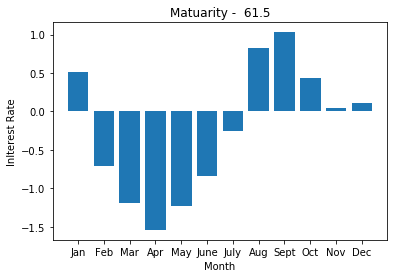

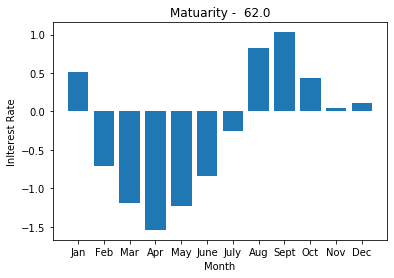

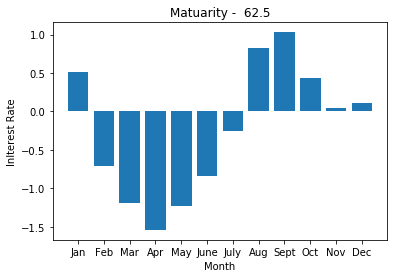

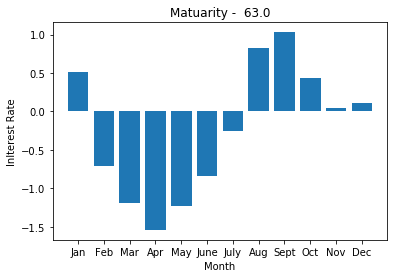

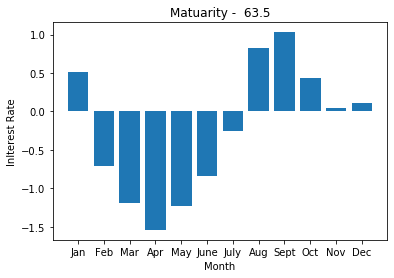

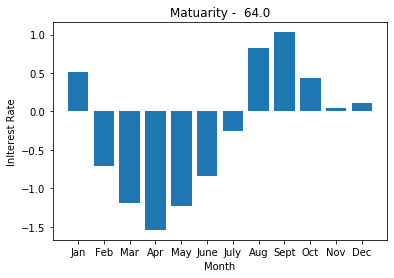

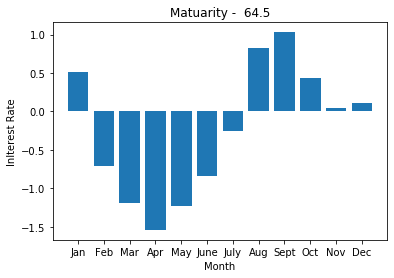

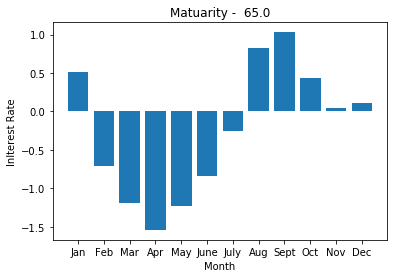

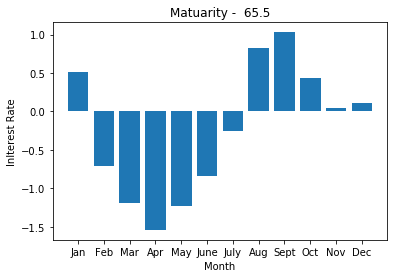

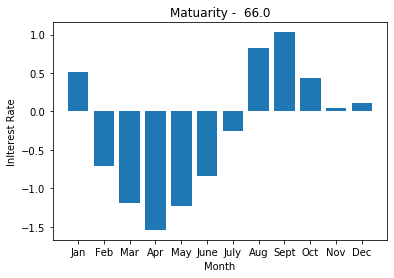

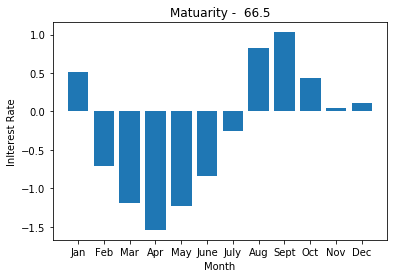

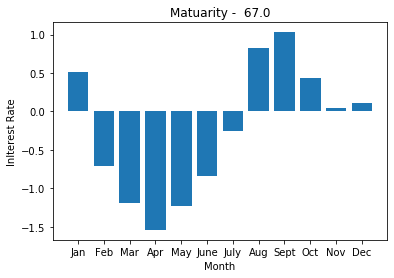

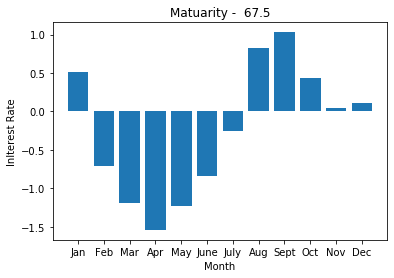

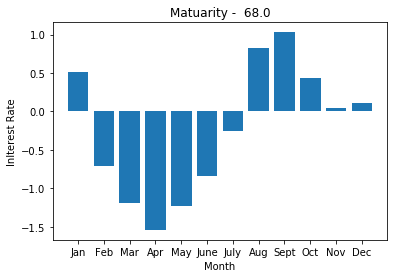

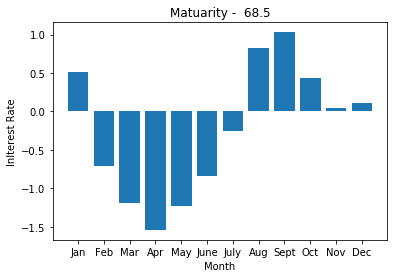

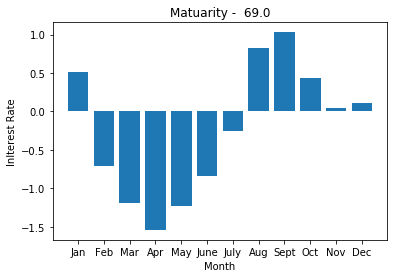

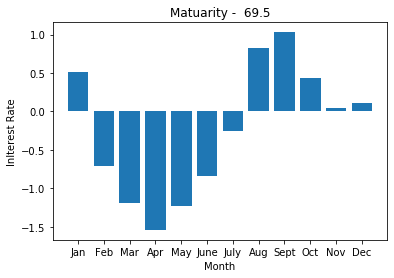

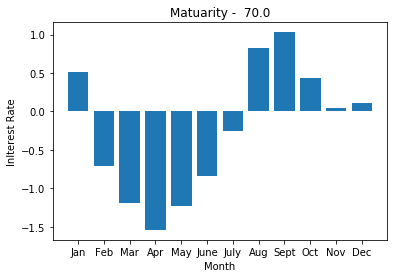

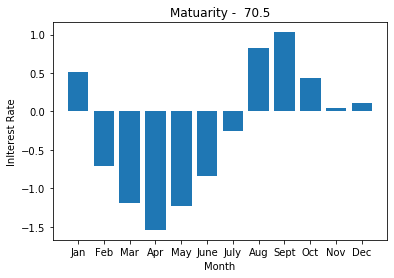

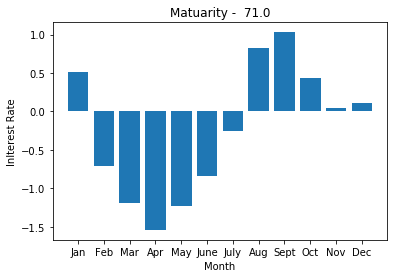

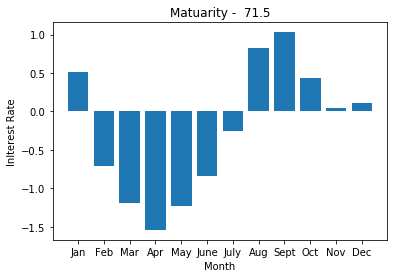

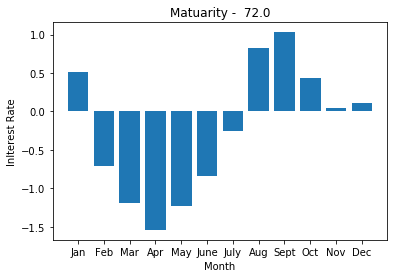

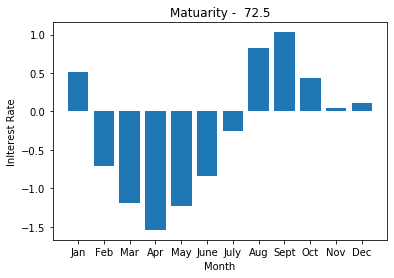

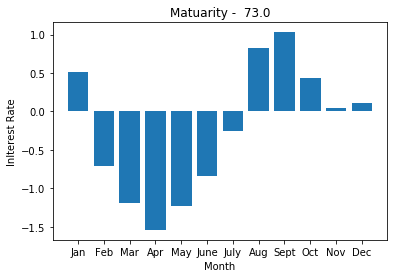

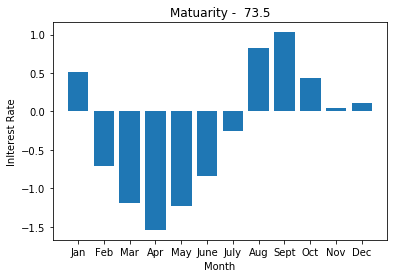

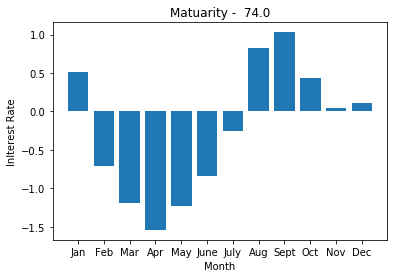

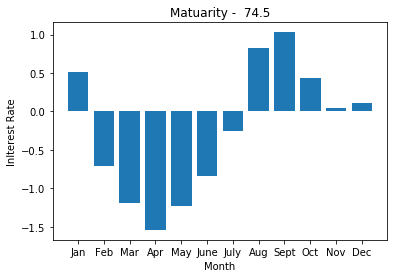

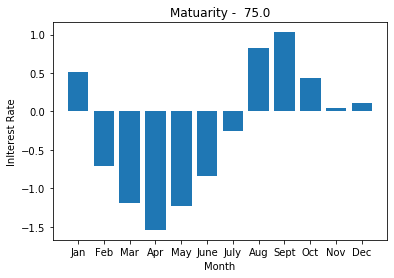

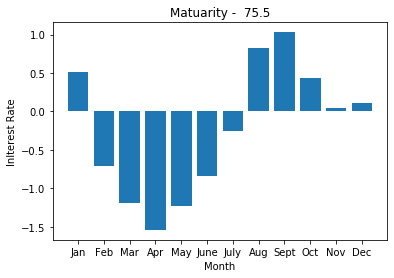

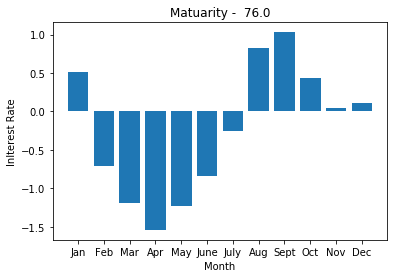

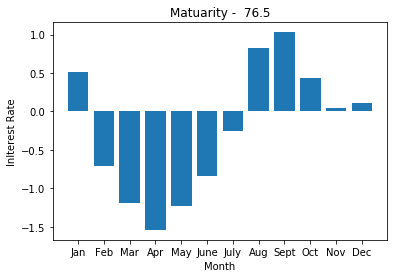

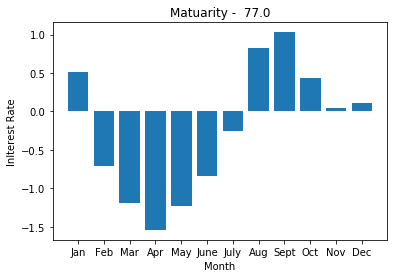

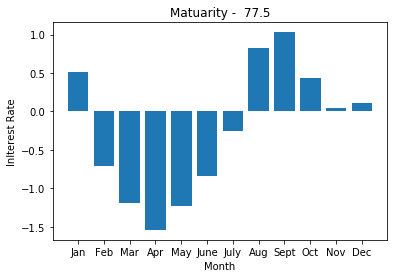

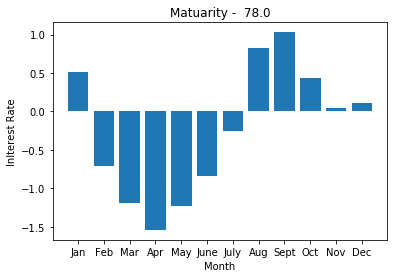

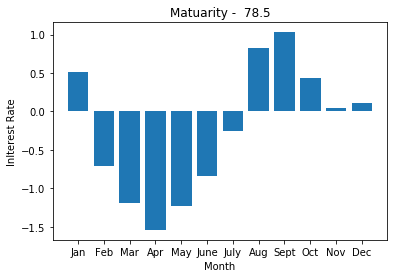

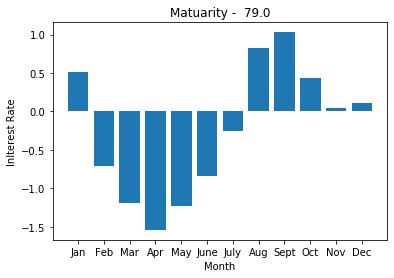

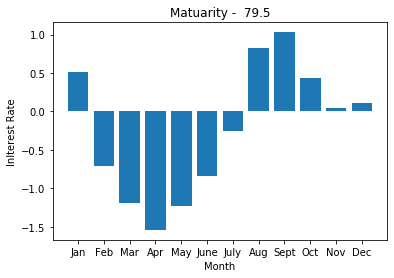

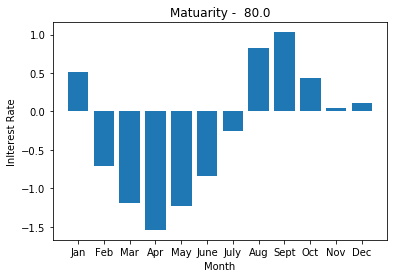

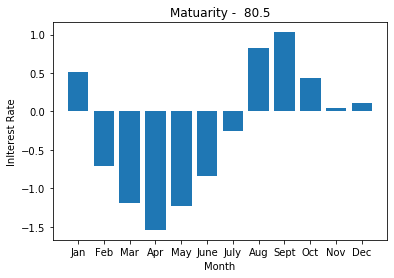

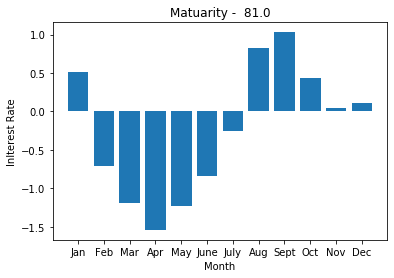

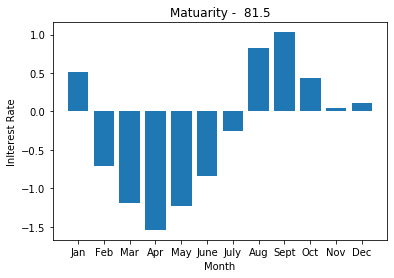

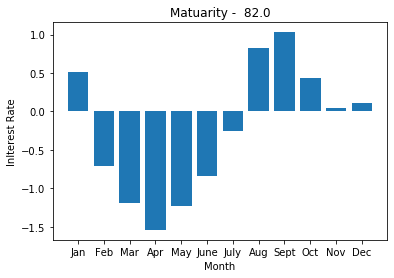

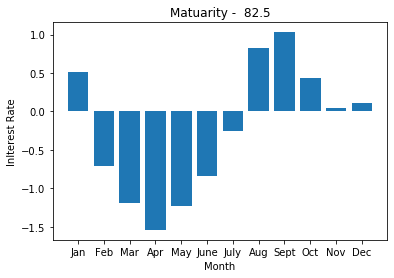

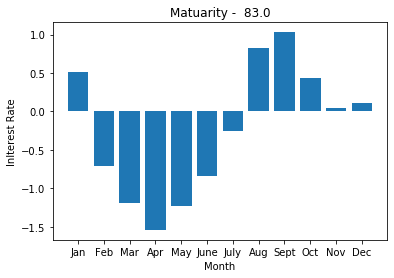

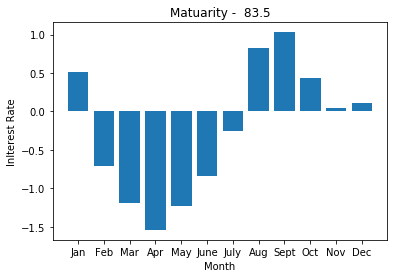

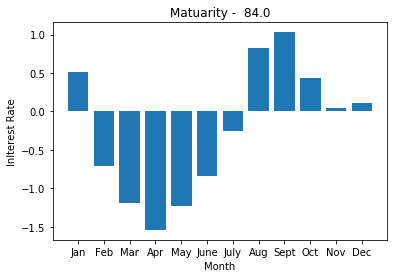

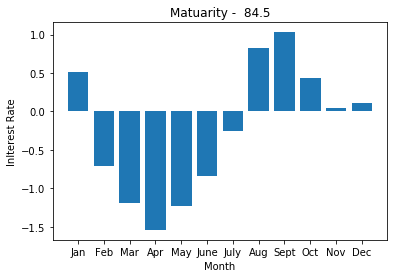

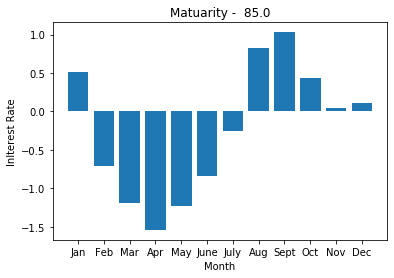

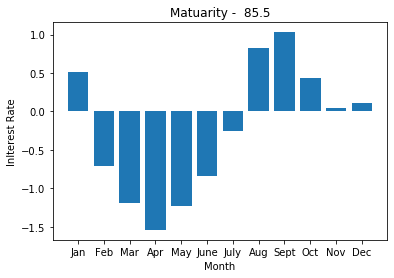

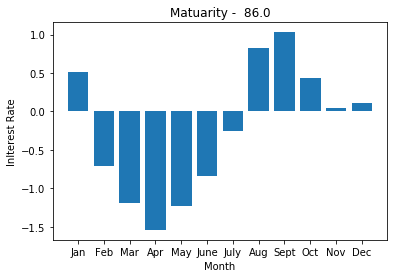

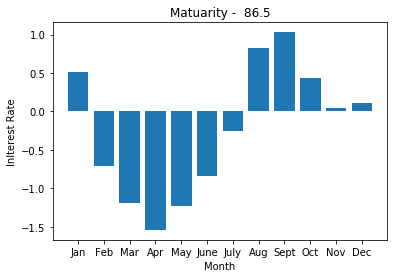

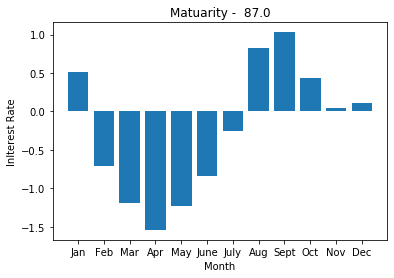

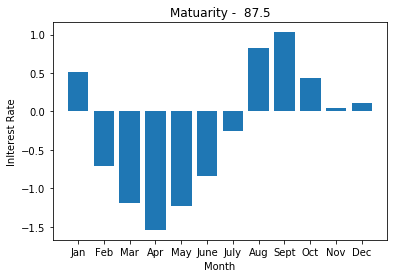

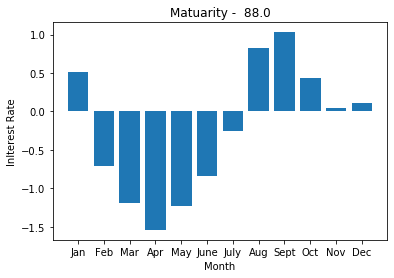

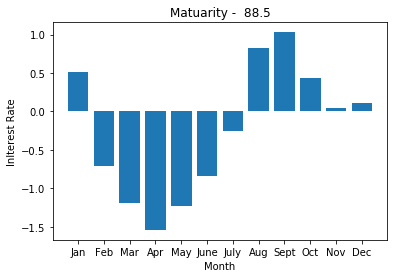

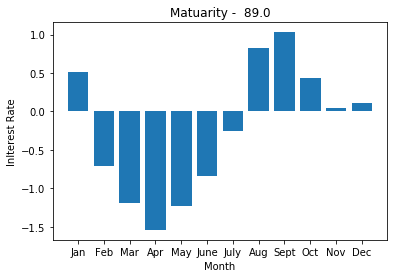

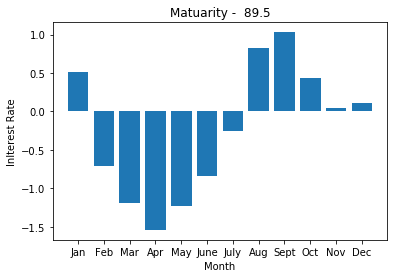

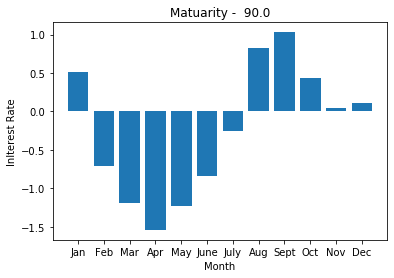

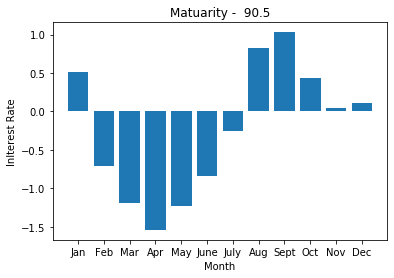

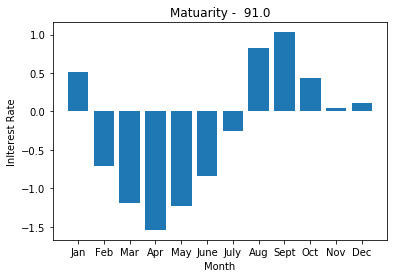

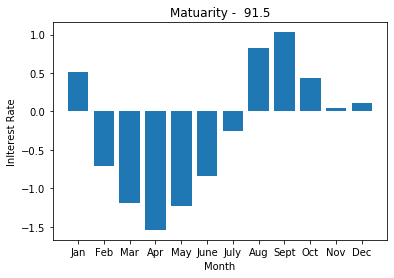

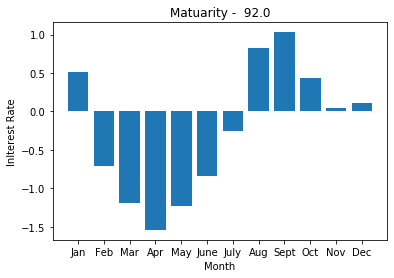

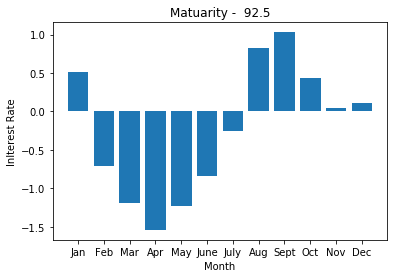

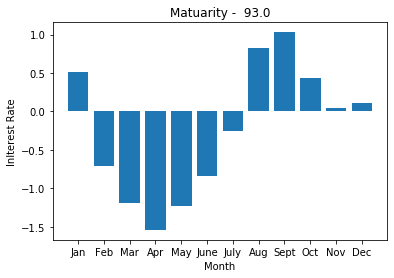

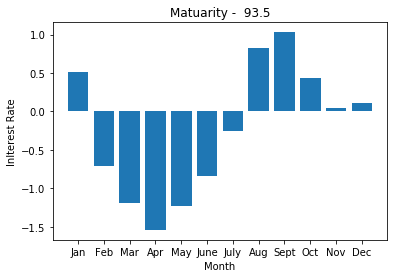

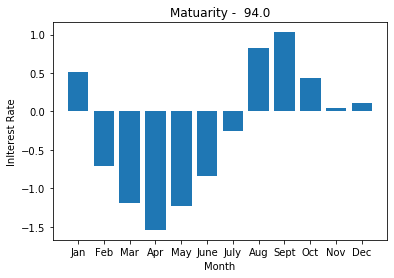

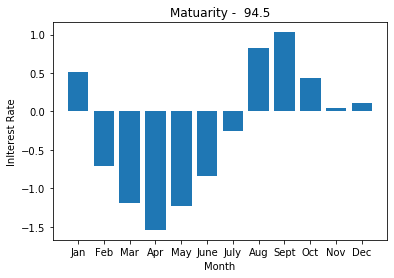

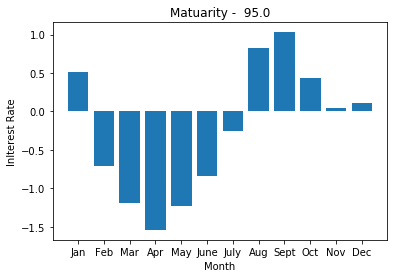

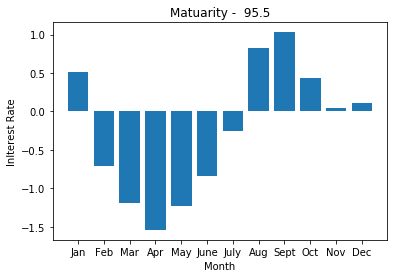

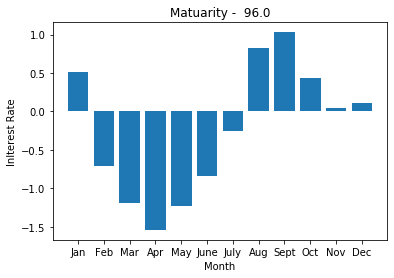

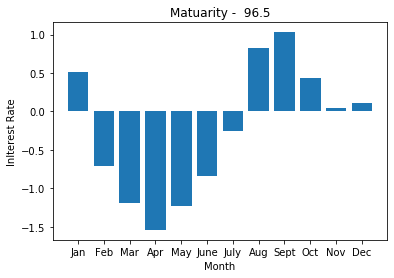

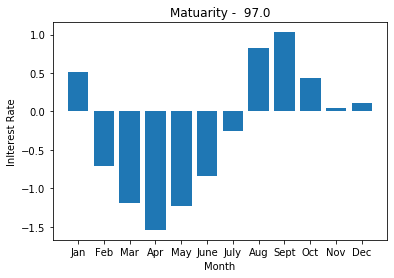

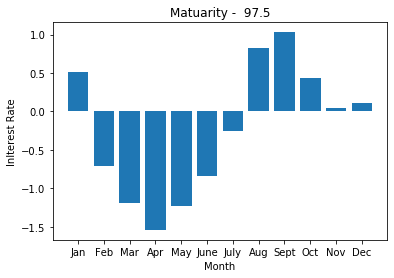

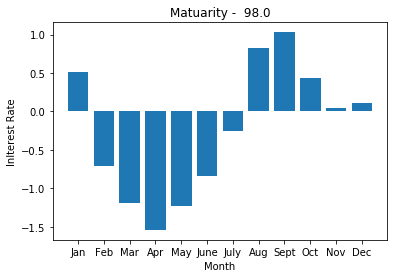

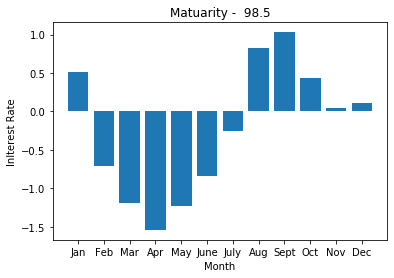

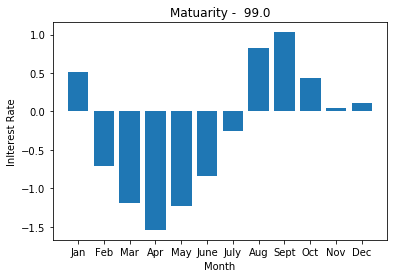

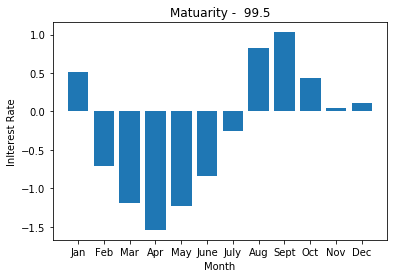

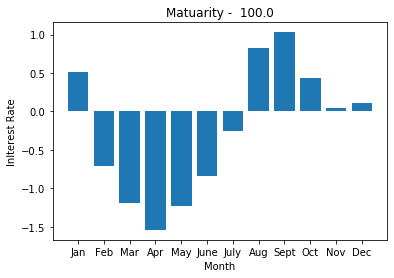

In [11]:
for i in range(0,len(df)):
    l = list(df.iloc[0,1:-1])
    plt.bar(name , l)
    plt.xlabel("Month")
    plt.ylabel("Inlterest Rate")
    plt.title("Matuarity -  "+str(df.iloc[i,0]))
    plt.show()
   

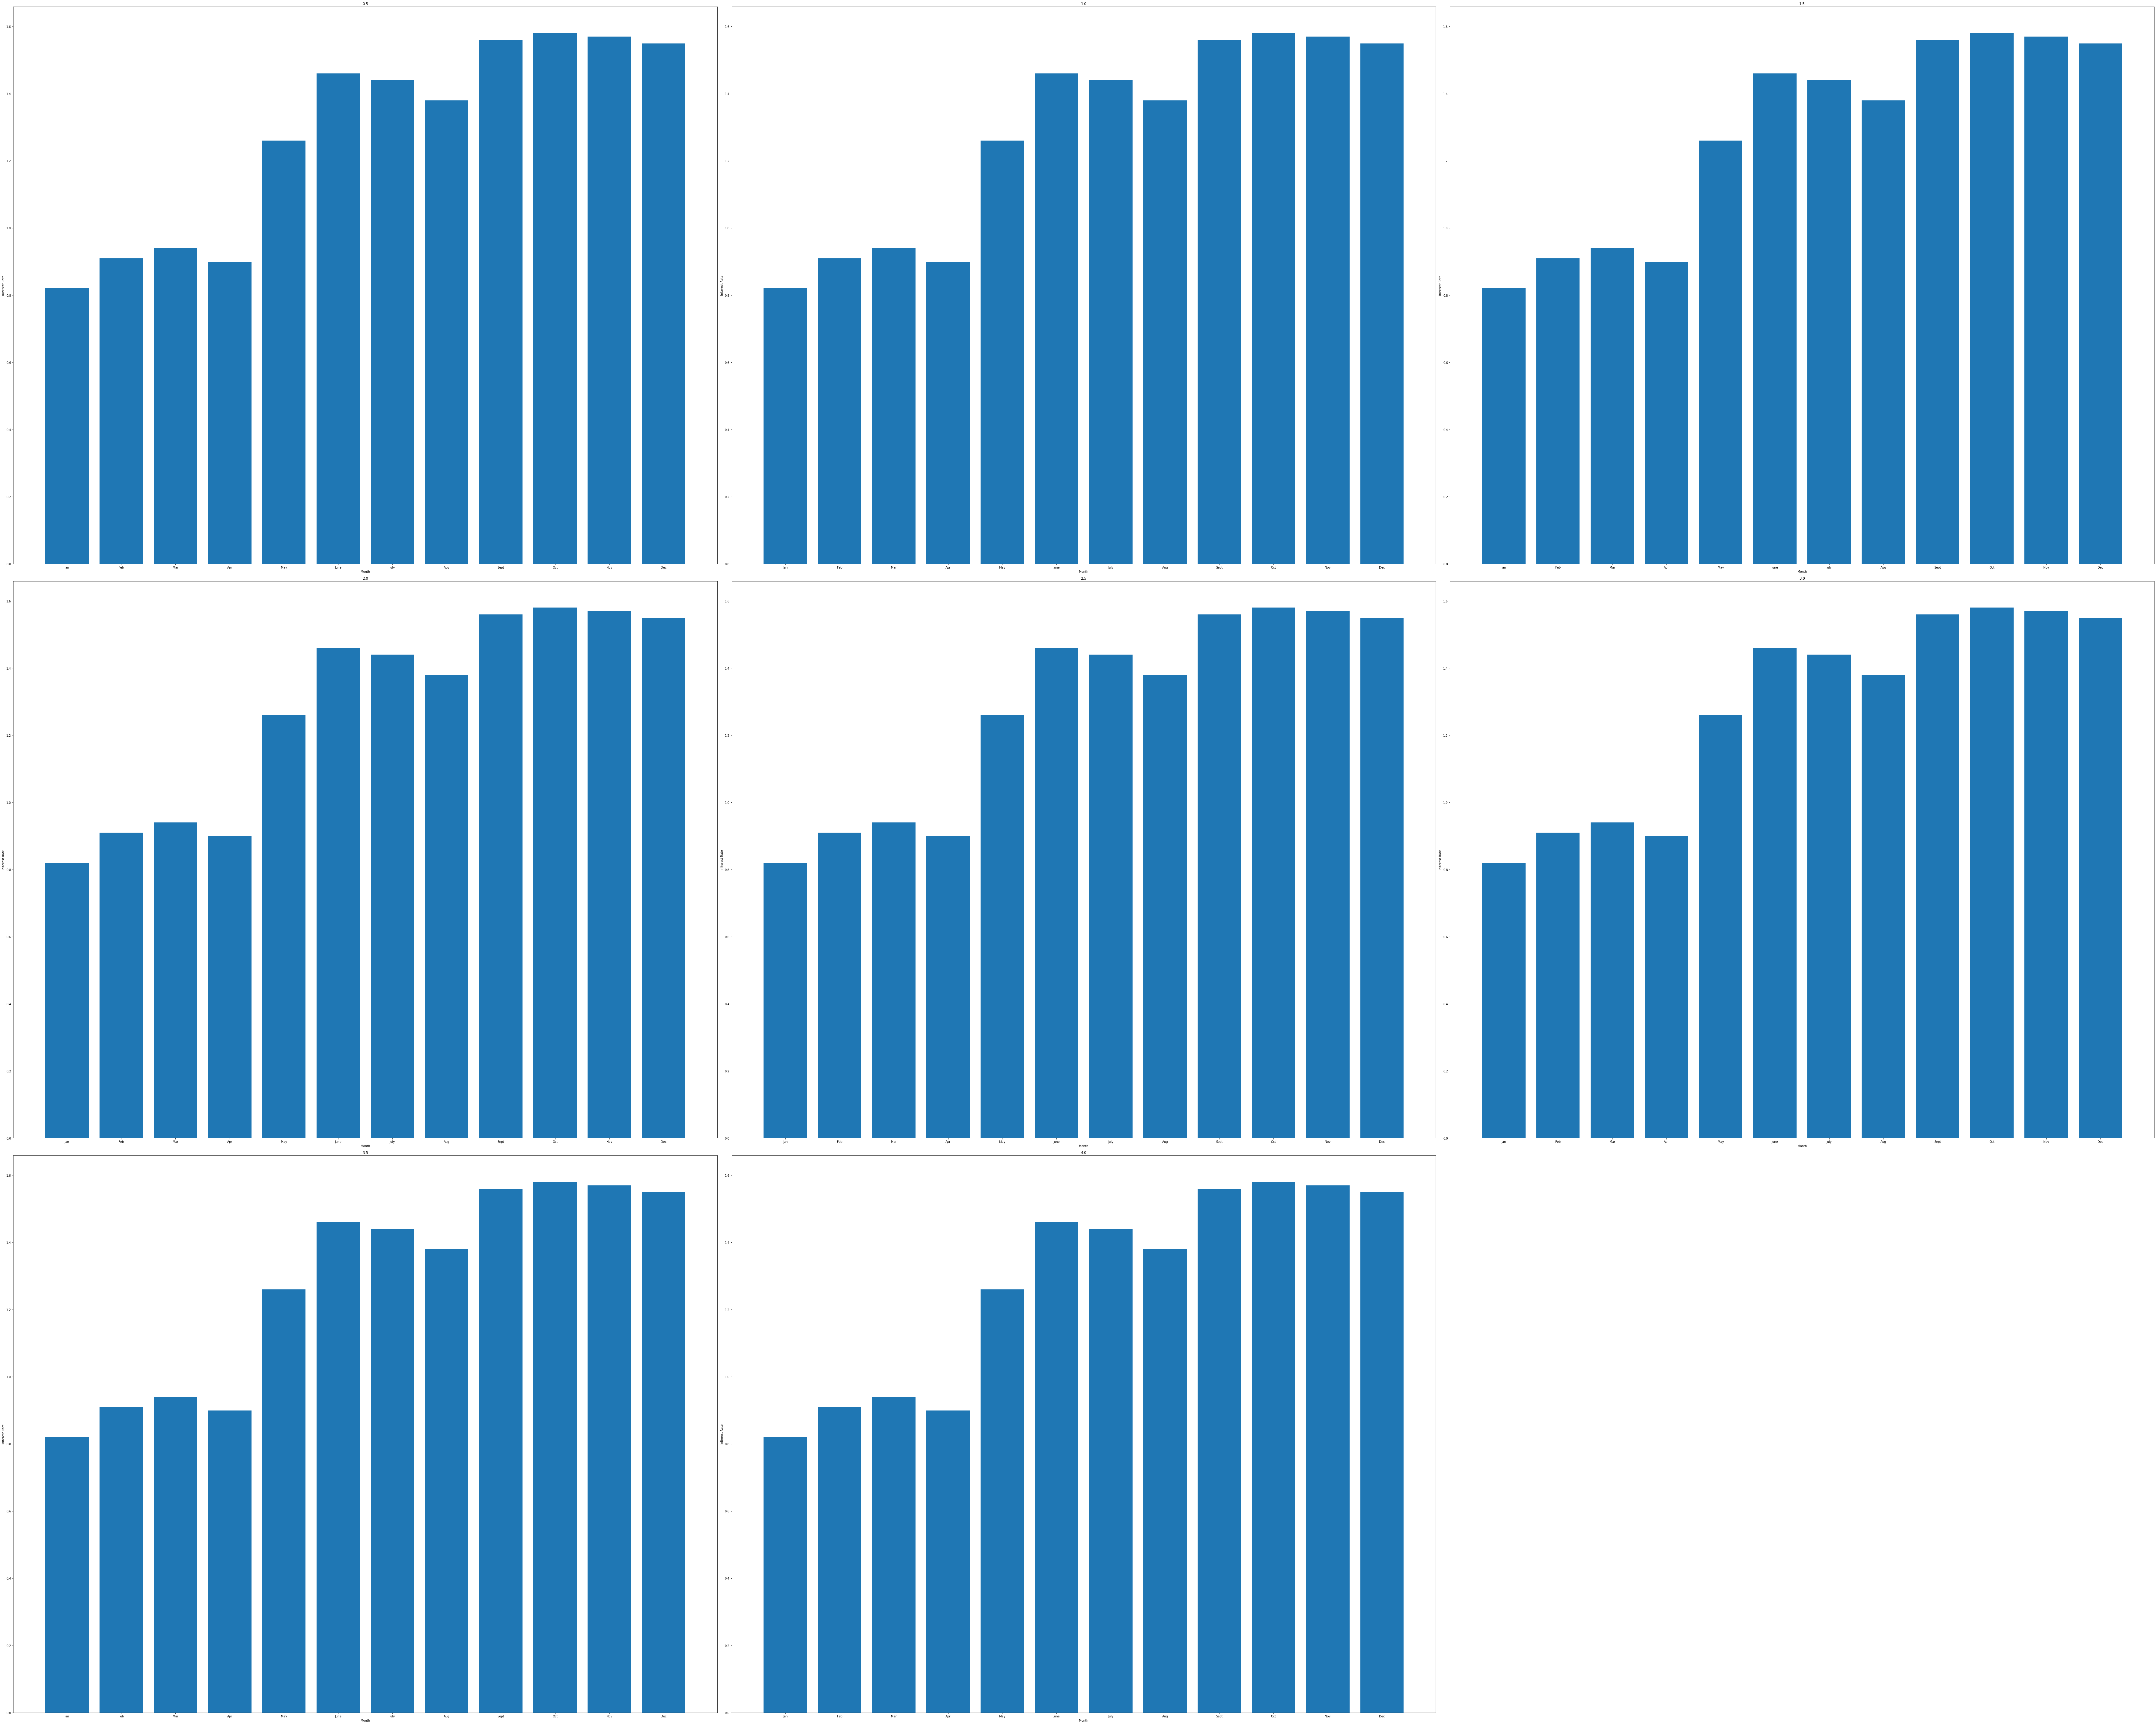

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,80))

for c,num in zip(mat, range(1,9)):
    df0=df[df['Matuarity']==c]
    l = list(df.iloc[i-1,1:-1])
    ax = fig.add_subplot(3,3,num)
    ax.bar(name , l)
    ax.set_xlabel("Month")
    ax.set_ylabel("Inlterest Rate")
    ax.set_title(c)

plt.tight_layout()
plt.show()

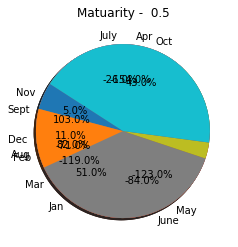

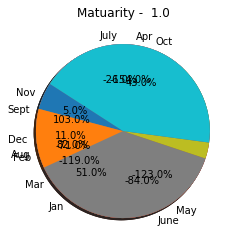

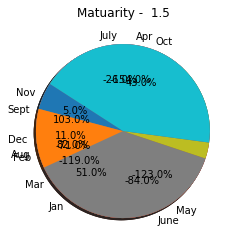

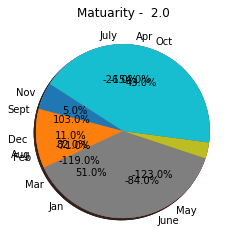

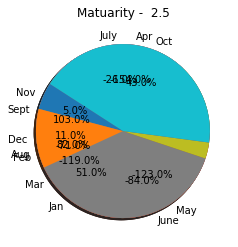

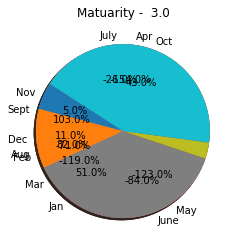

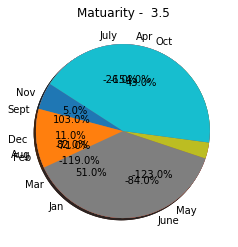

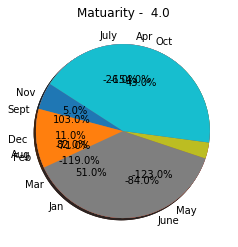

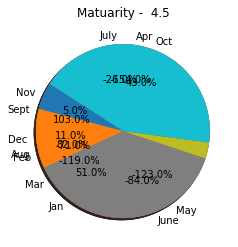

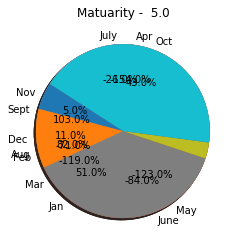

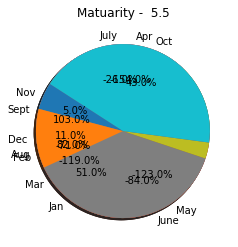

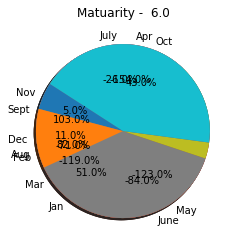

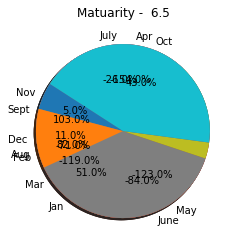

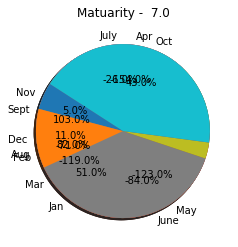

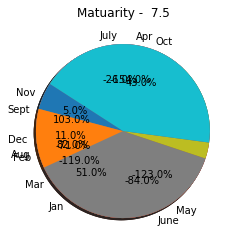

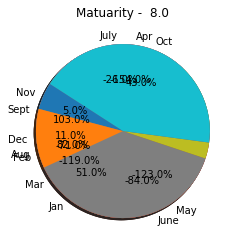

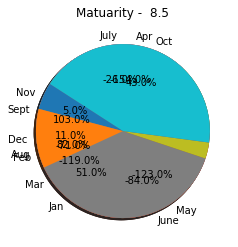

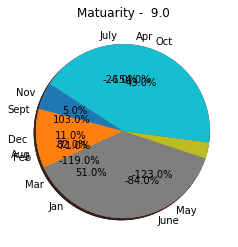

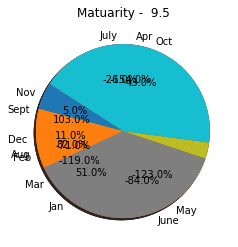

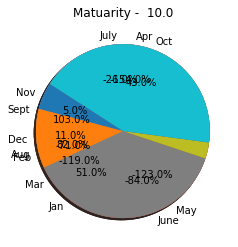

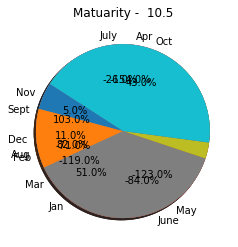

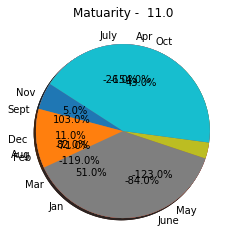

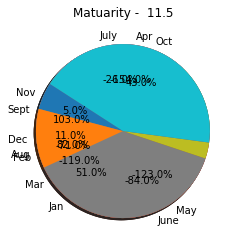

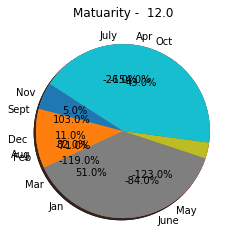

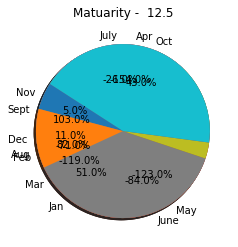

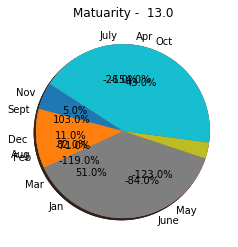

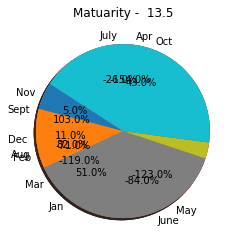

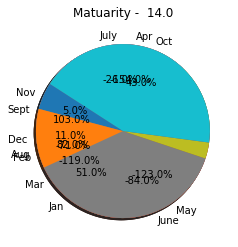

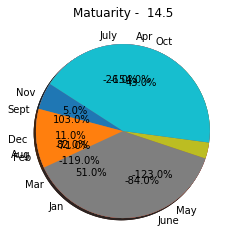

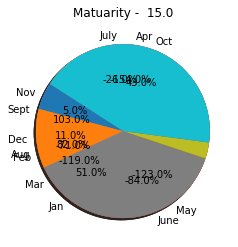

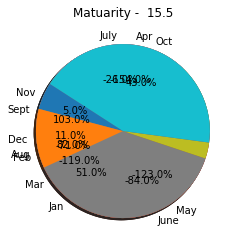

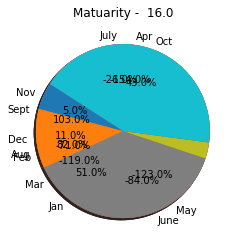

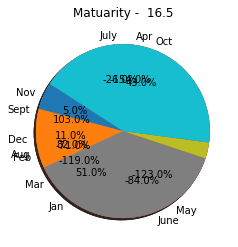

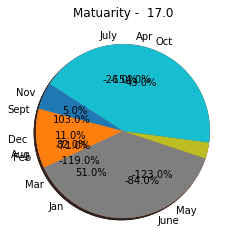

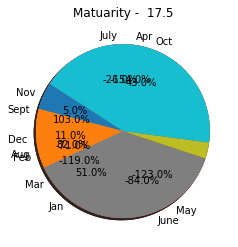

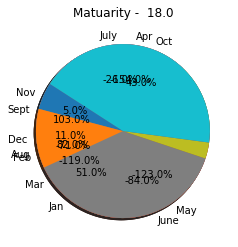

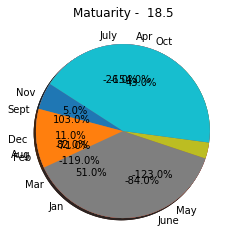

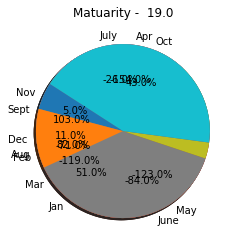

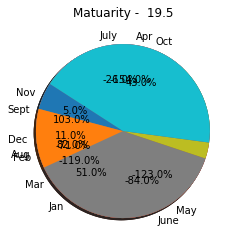

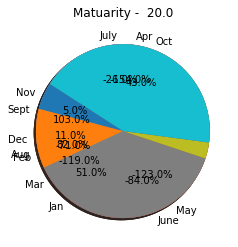

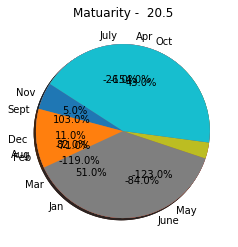

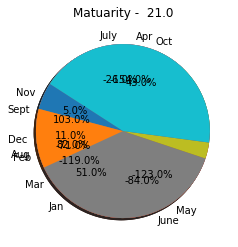

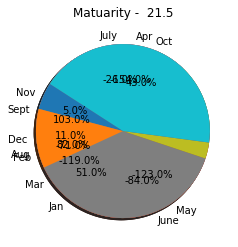

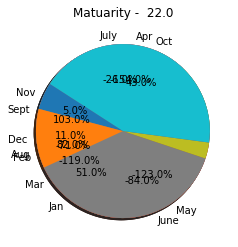

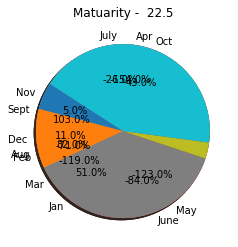

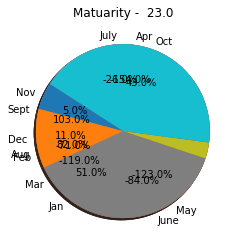

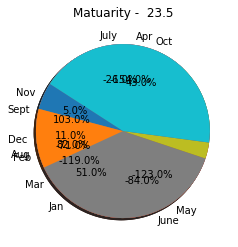

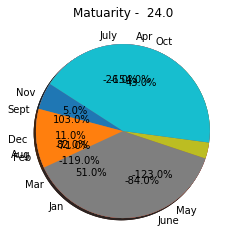

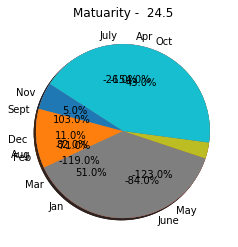

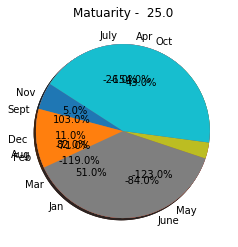

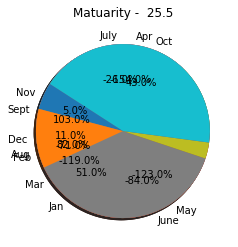

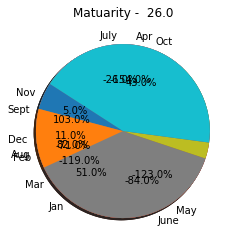

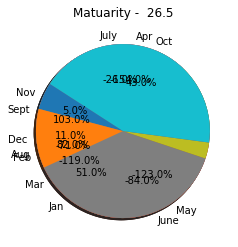

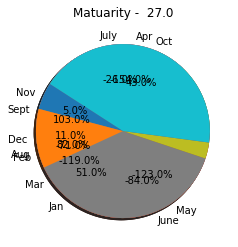

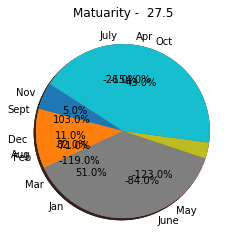

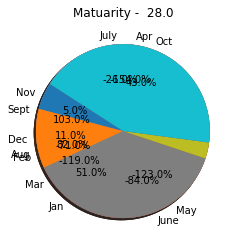

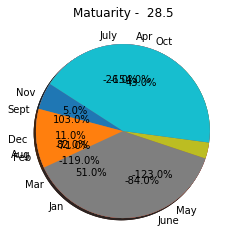

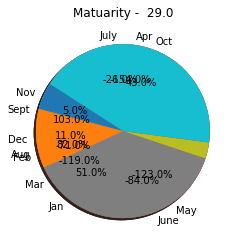

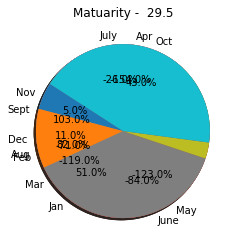

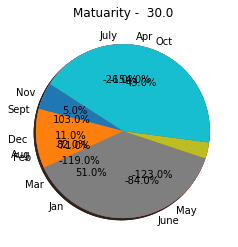

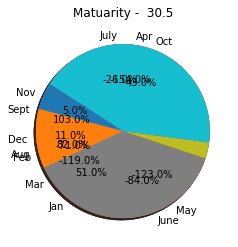

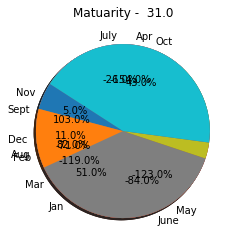

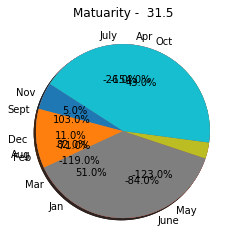

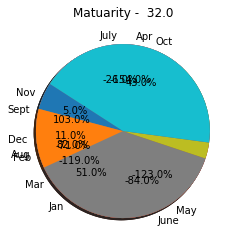

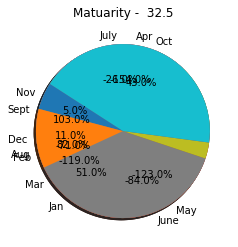

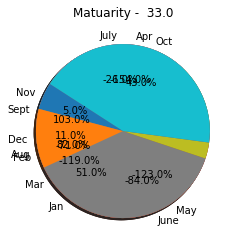

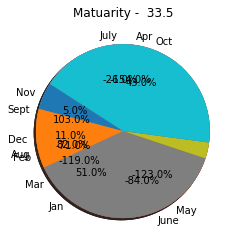

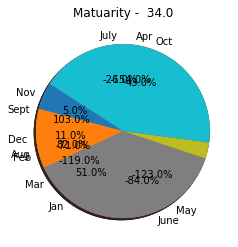

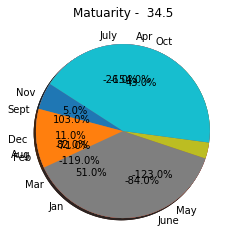

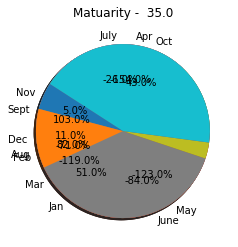

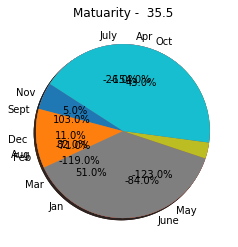

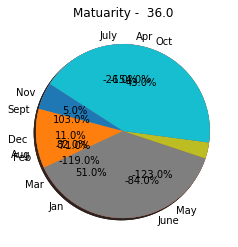

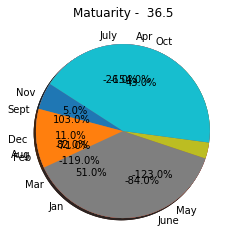

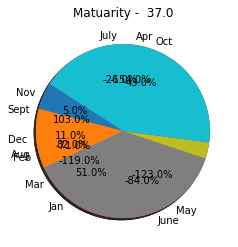

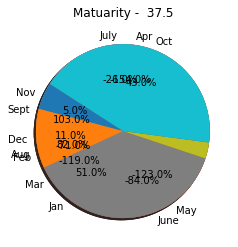

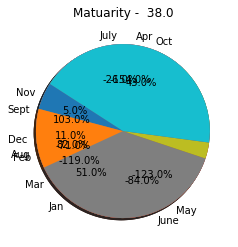

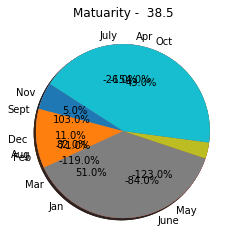

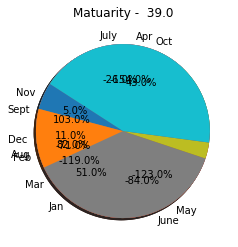

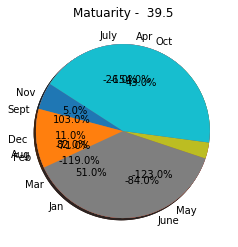

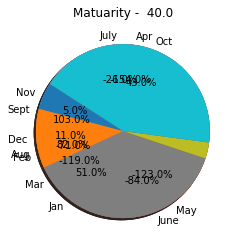

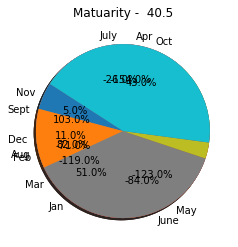

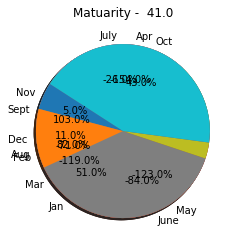

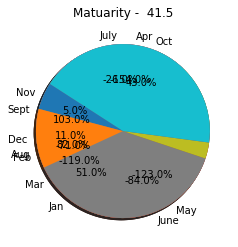

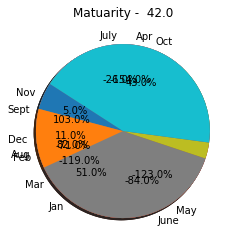

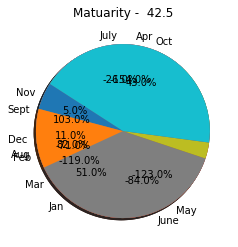

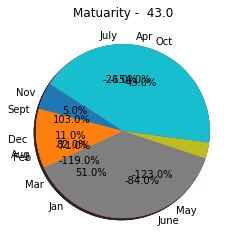

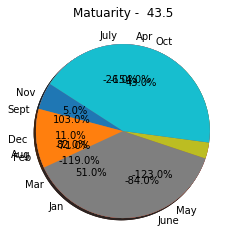

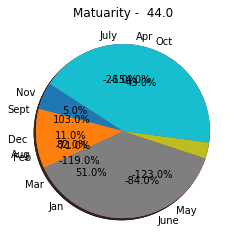

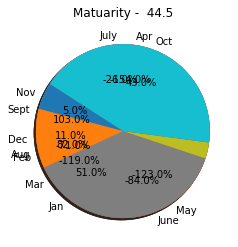

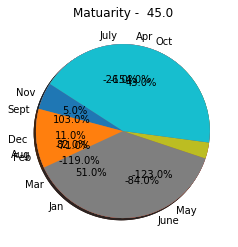

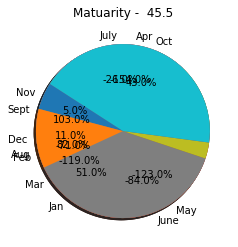

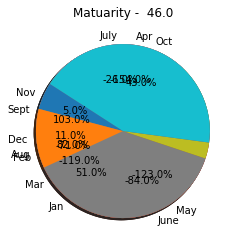

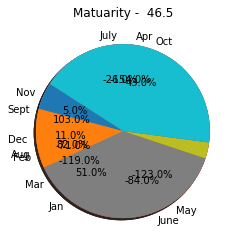

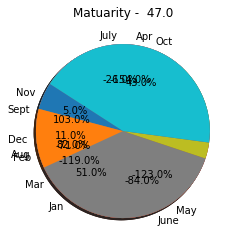

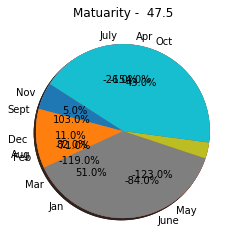

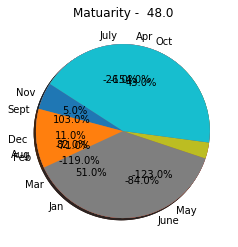

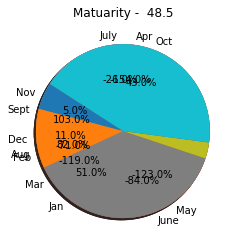

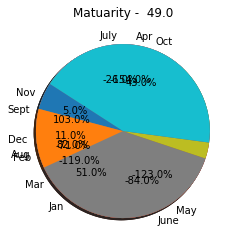

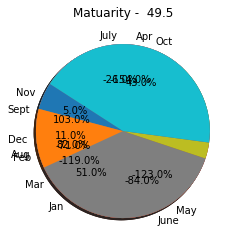

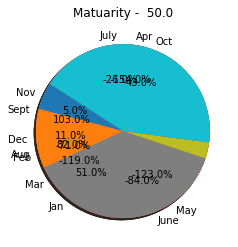

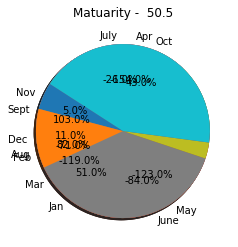

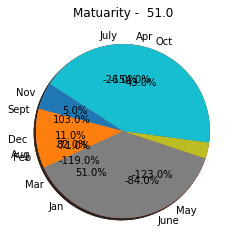

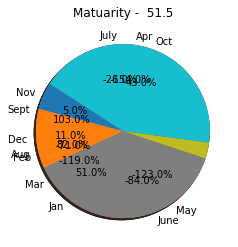

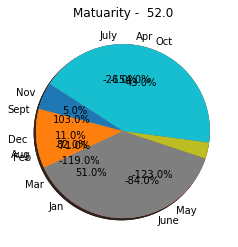

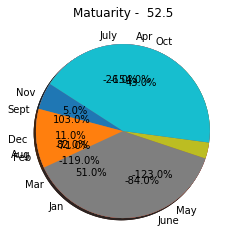

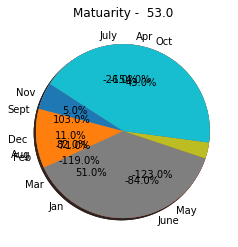

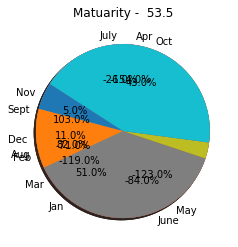

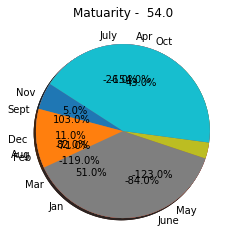

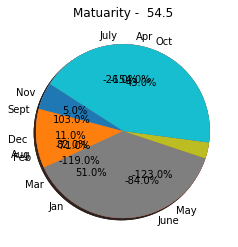

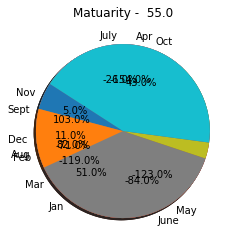

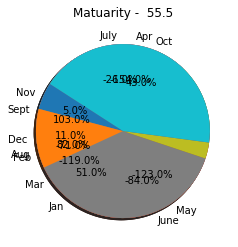

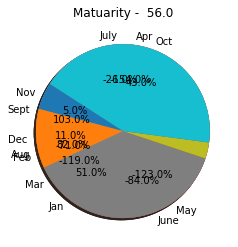

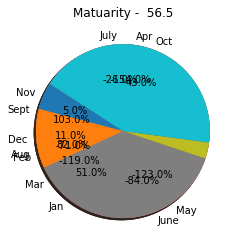

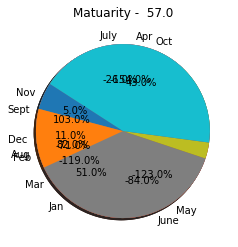

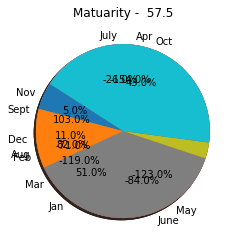

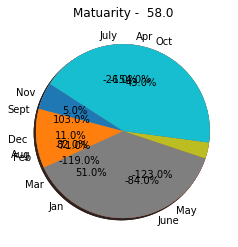

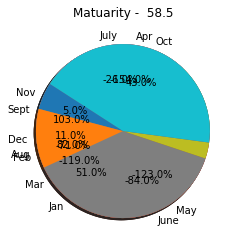

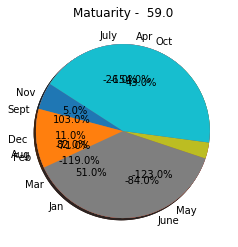

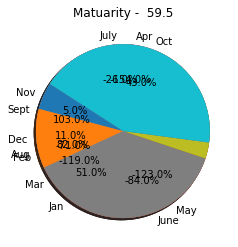

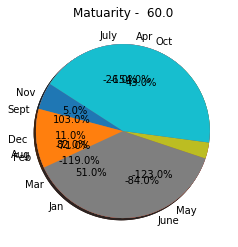

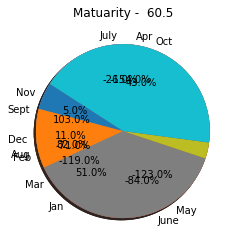

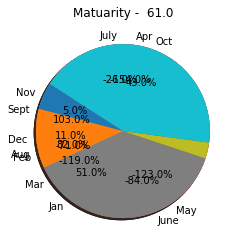

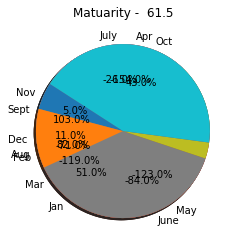

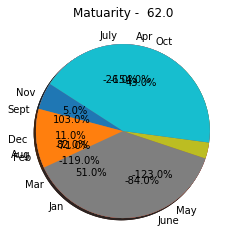

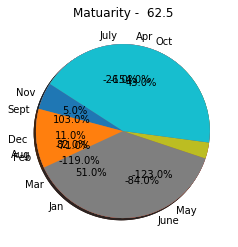

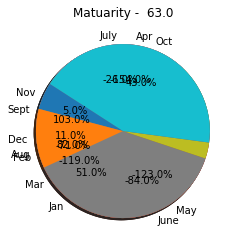

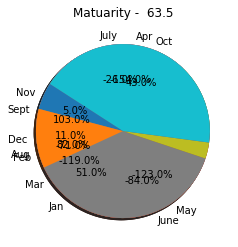

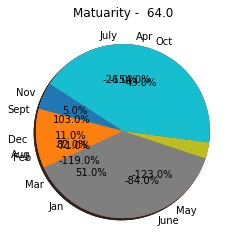

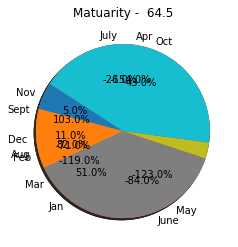

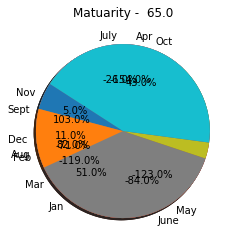

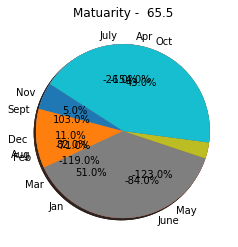

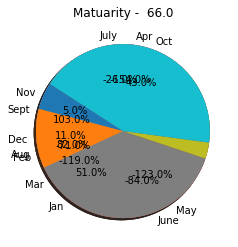

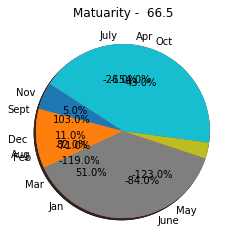

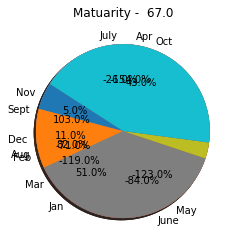

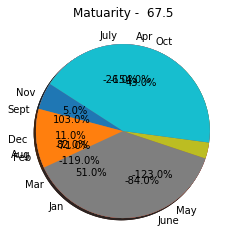

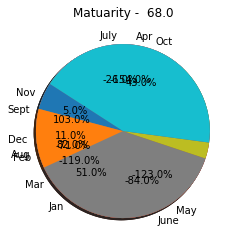

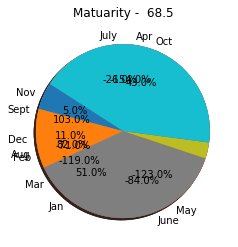

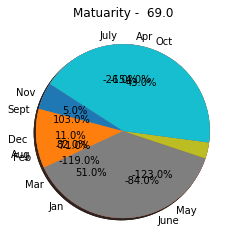

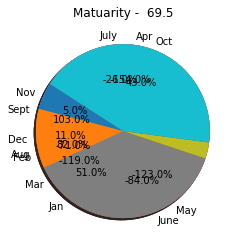

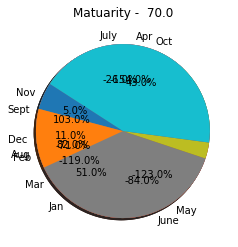

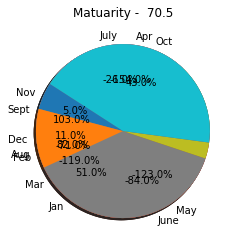

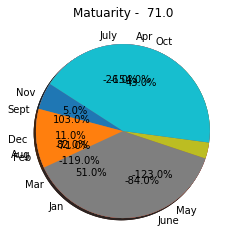

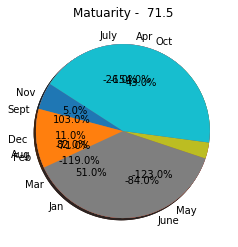

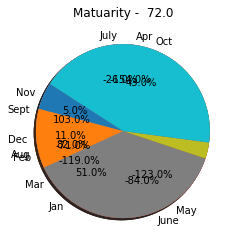

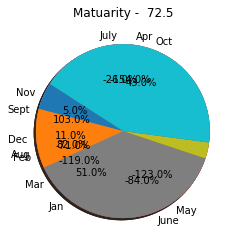

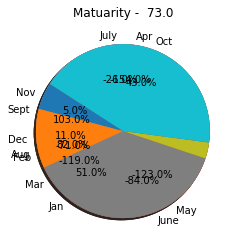

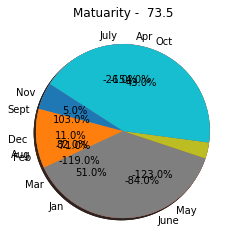

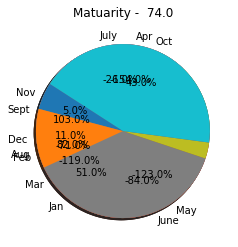

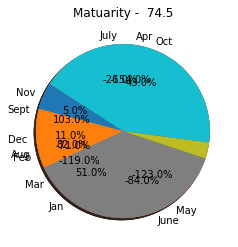

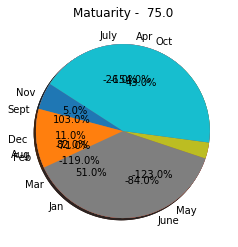

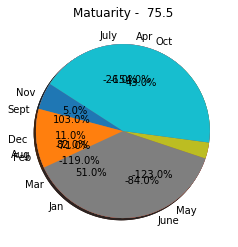

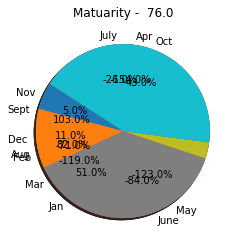

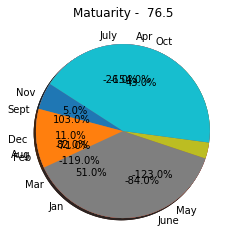

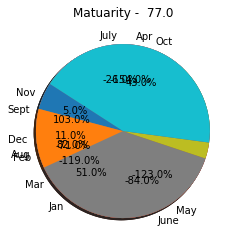

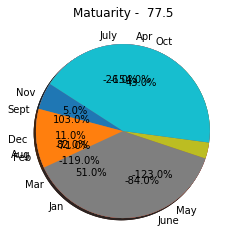

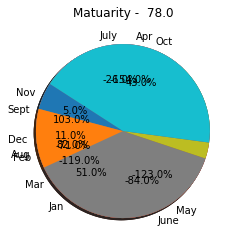

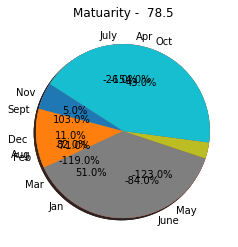

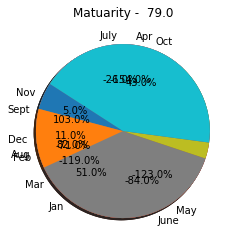

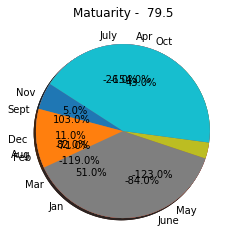

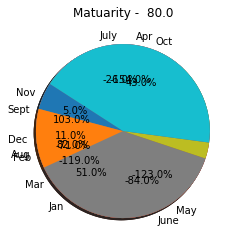

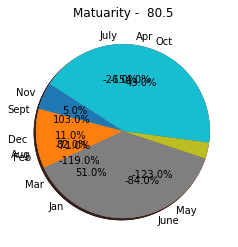

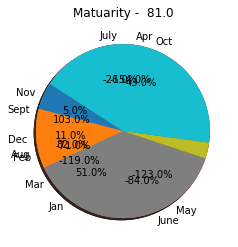

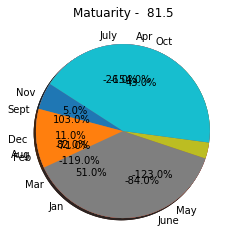

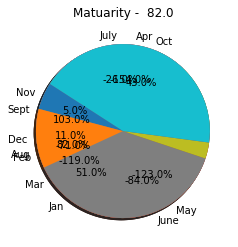

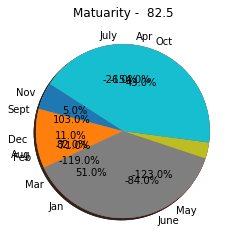

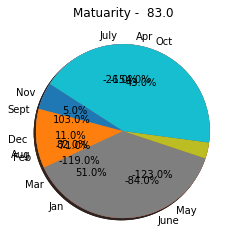

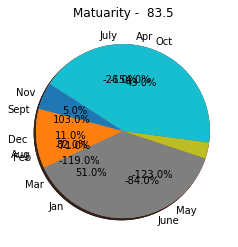

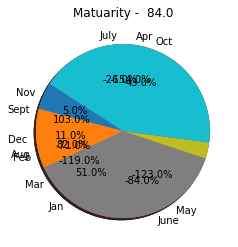

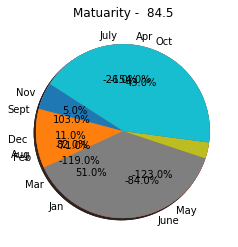

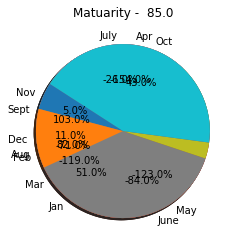

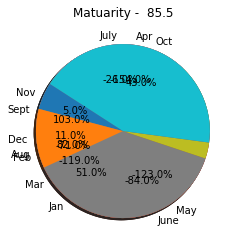

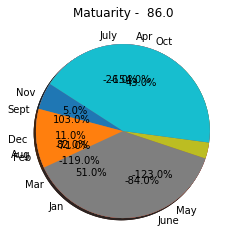

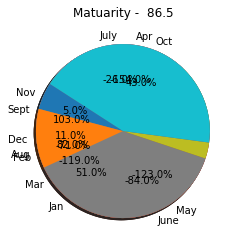

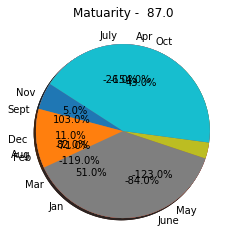

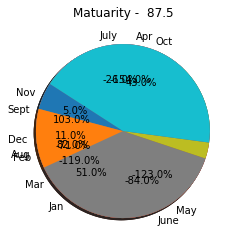

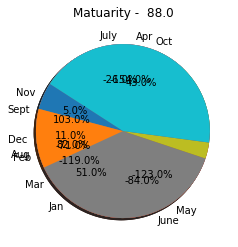

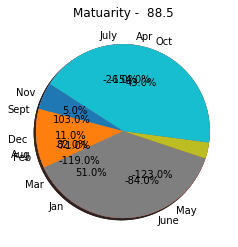

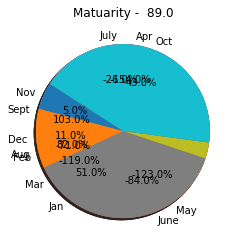

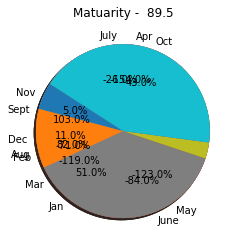

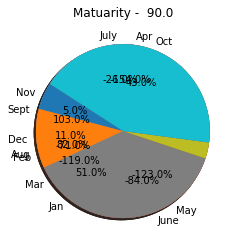

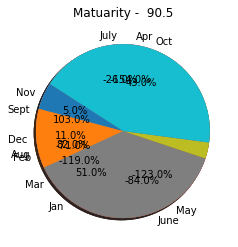

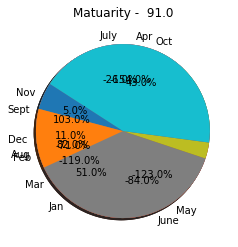

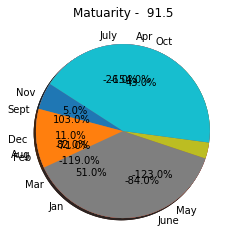

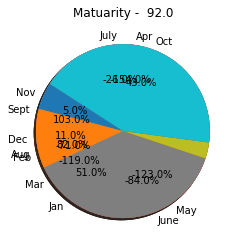

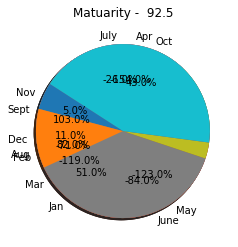

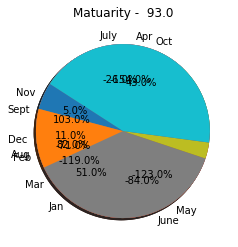

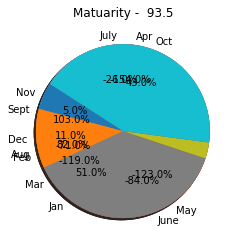

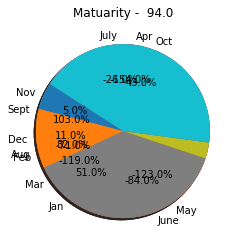

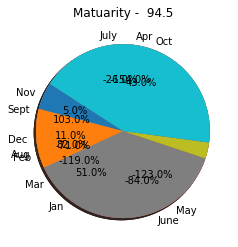

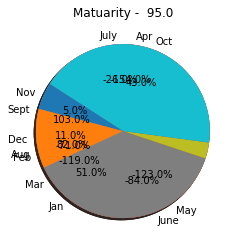

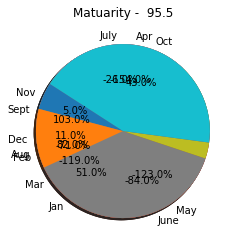

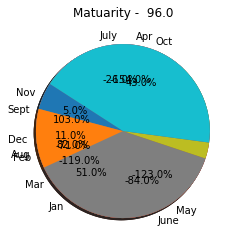

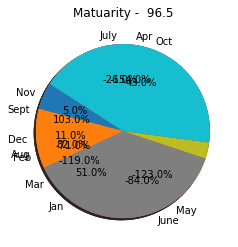

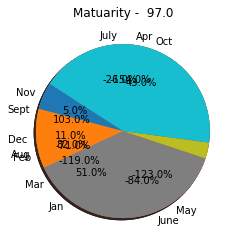

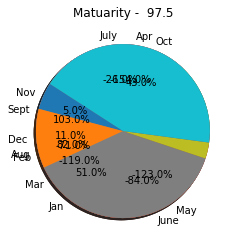

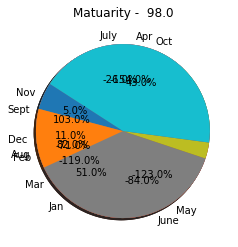

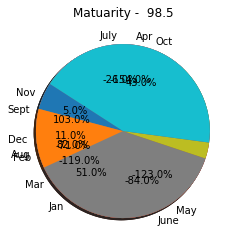

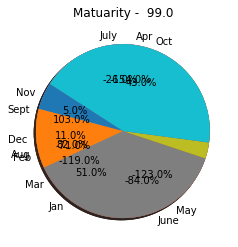

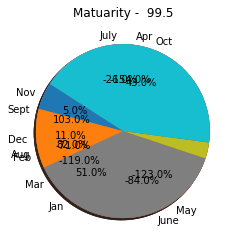

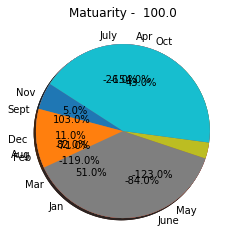

In [13]:
for i in range(0,len(df)):
    l = list(df.iloc[0,1:-1])
    plt.pie(l, labels=name, 
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Matuarity -  "+str(df.iloc[i,0]))
    theme = plt.get_cmap('copper')
    plt.show()
   

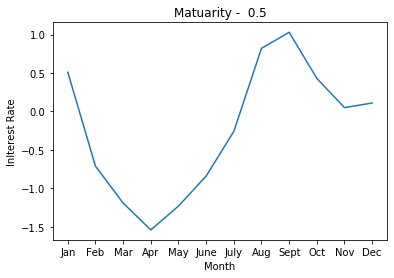

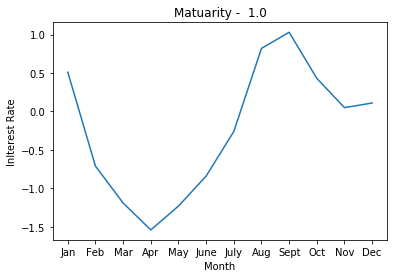

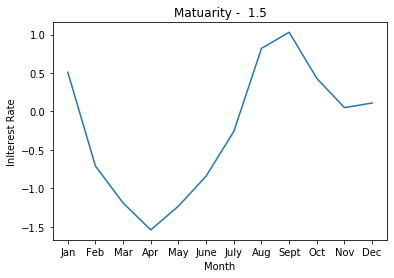

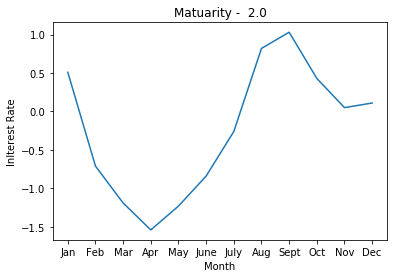

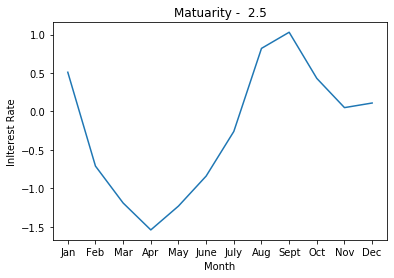

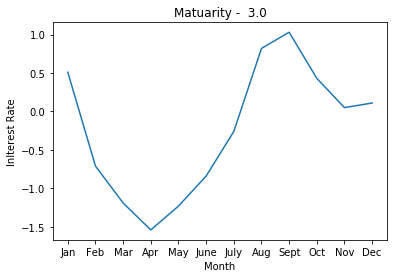

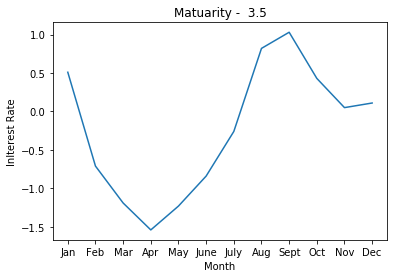

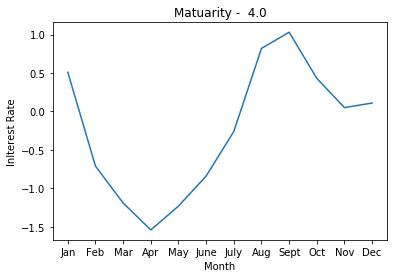

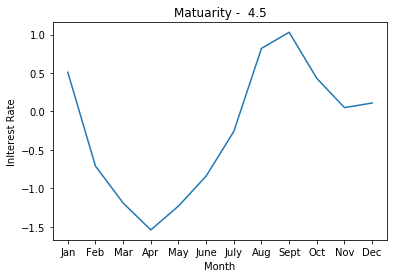

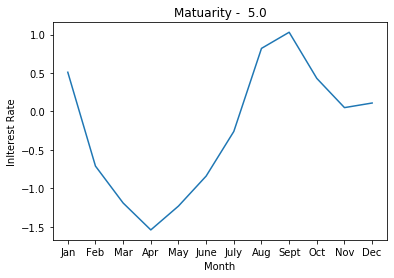

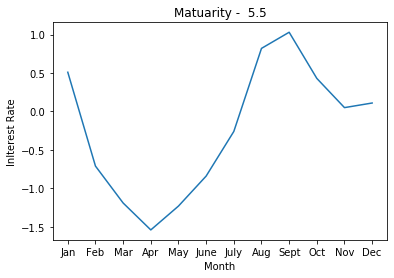

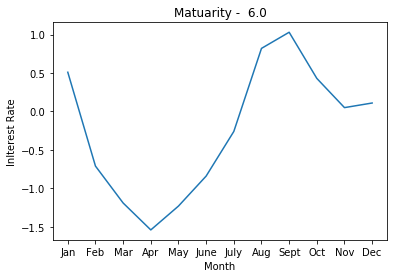

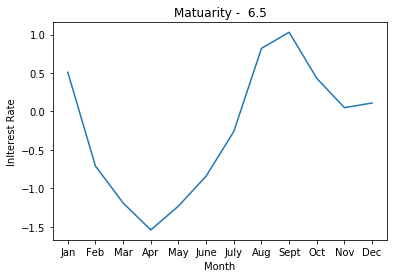

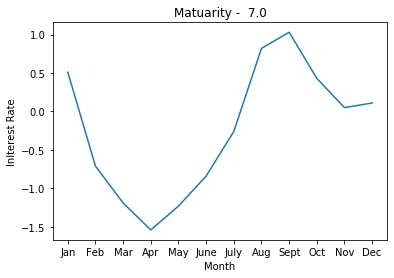

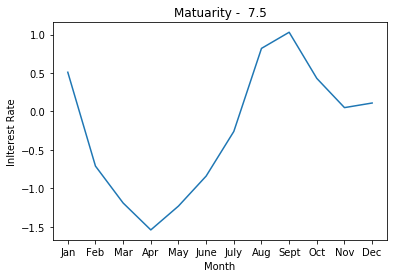

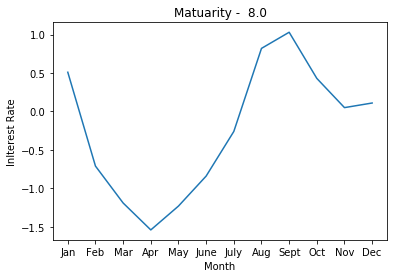

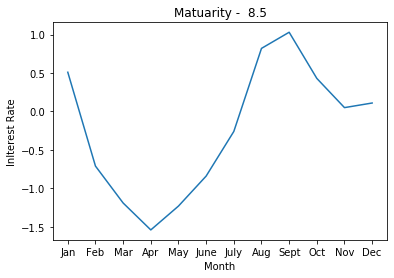

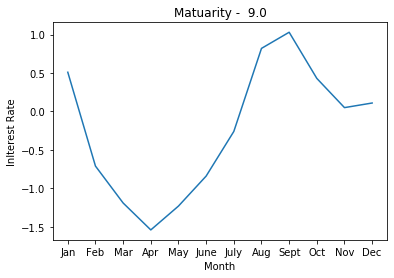

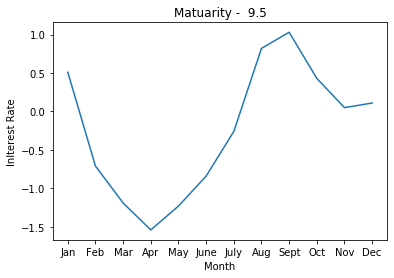

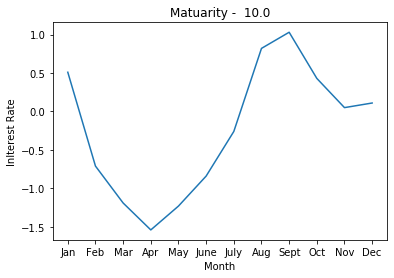

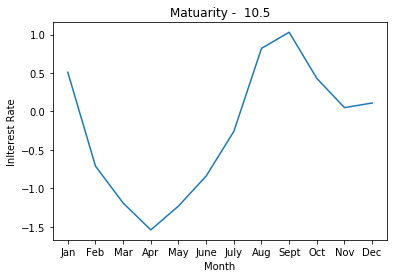

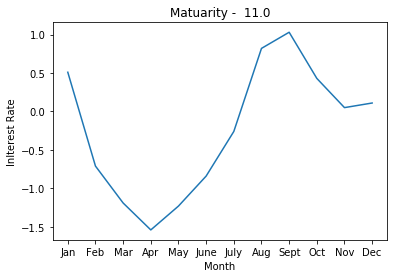

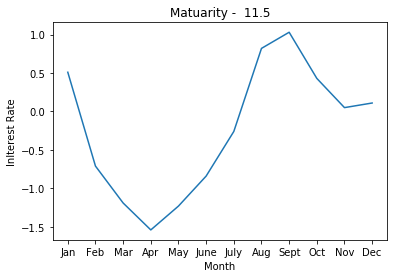

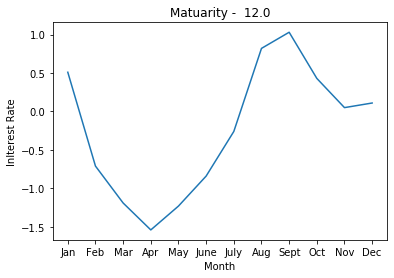

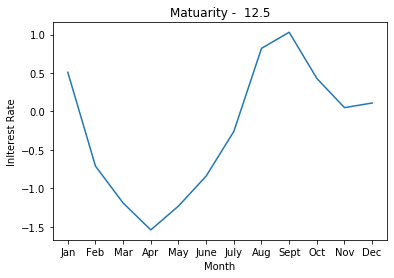

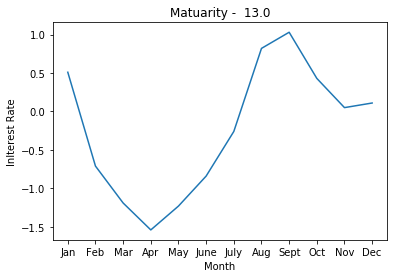

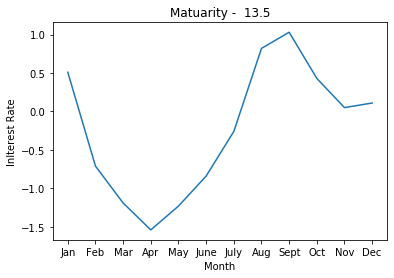

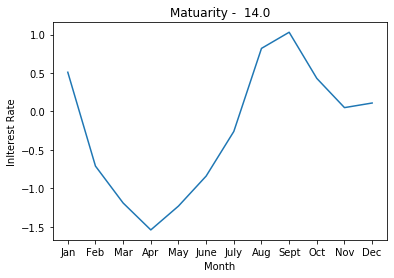

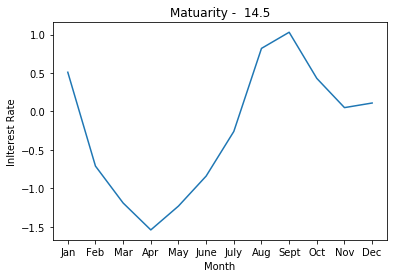

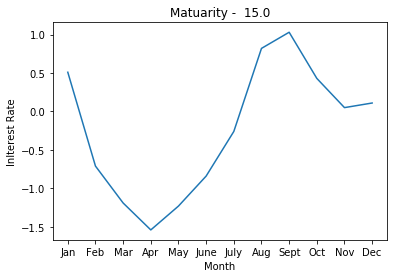

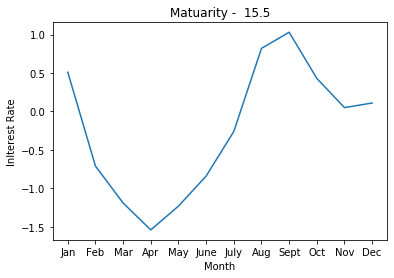

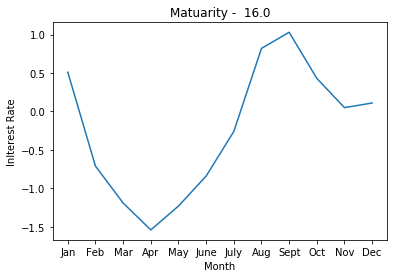

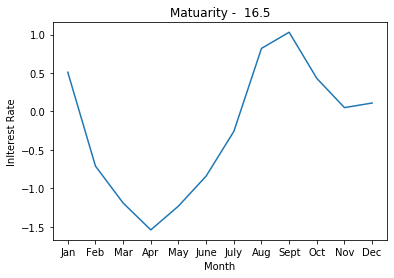

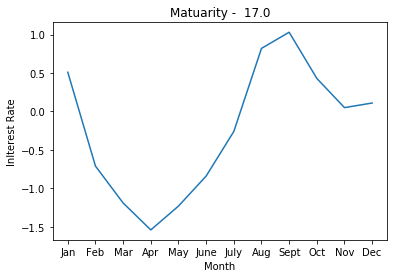

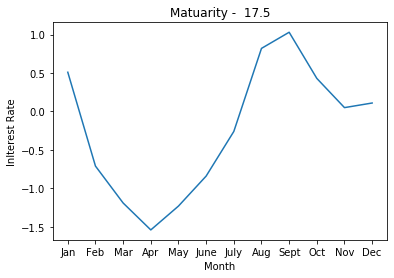

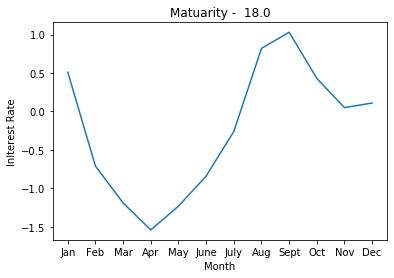

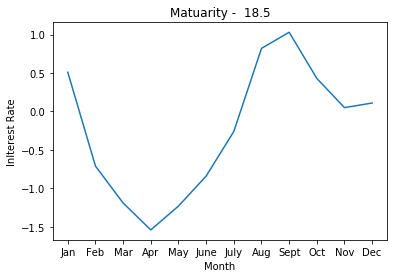

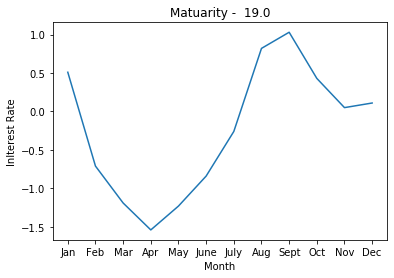

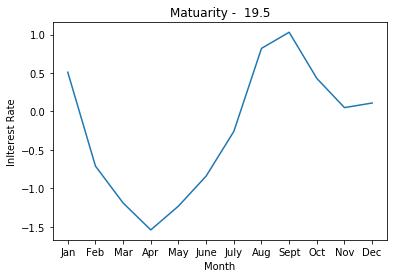

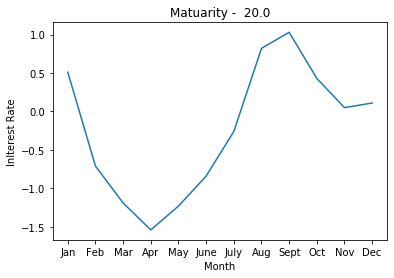

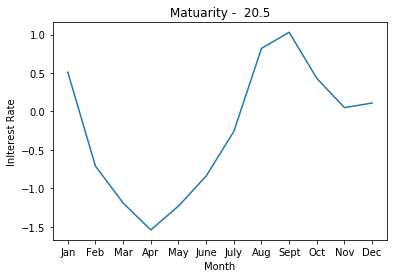

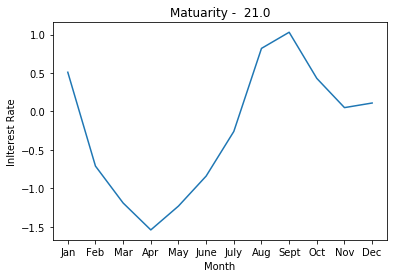

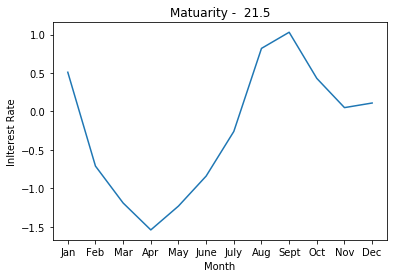

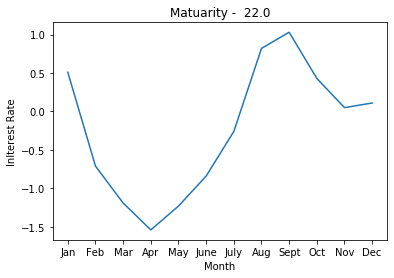

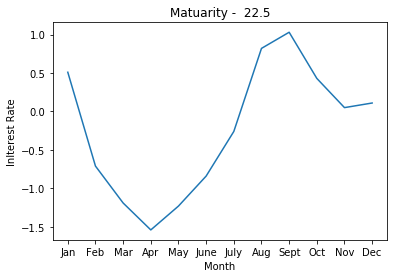

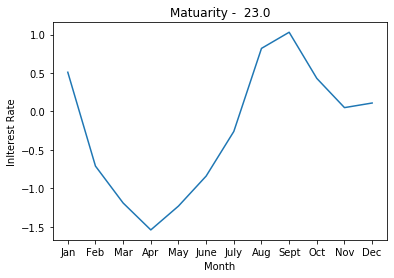

In [ ]:
for i in range(0,len(df)):
    l = list(df.iloc[0,1:-1])
    plt.plot(name , l)
    plt.xlabel("Month")
    plt.ylabel("Inlterest Rate")
    plt.title("Matuarity -  "+str(df.iloc[i,0]))
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))

for c,num in zip(mat, range(1,9)):
    df0=df[df['Matuarity']==c]
    l = list(df.iloc[i-1,1:-1])
    ax = fig.add_subplot(3,3,num)
    ax.plot(name, l ,color = 'g',linewidth=10, alpha=0.7 )
    ax.set_xlabel('Month')
    ax.set_ylabel('Interest average')
    ax.set_title(c)


plt.show()

In [ ]:
df['sum'].sum()/200